In [4]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [100]:
# set font.
plt.rcParams.update({'font.family':'Arial'})

In [6]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns
import pymysql.cursors
import pandas as pd
import numpy as np
import connect_to_db as cn
import json
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import csv
import parmap
import random

In [7]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames_words = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_10_for_tsne")
filenames_weights = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_weights_10_for_tsne")

# union topic words

In [18]:
all_tws = []
all_weights = []

sorted_filenames_tws = sorted(filenames_words)
sorted_filenames_weights = sorted(filenames_weights)

for filename_wo, filename_we in zip(sorted_filenames_tws, sorted_filenames_weights):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_10_for_tsne/{filename_wo}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        all_tws.append(topics)
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_weights_10_for_tsne/{filename_we}', newline='') as f:
        reader = csv.reader(f)
        weights = list(reader)
        all_weights.append(weights)

all_tws = sum(all_tws, [])
all_weights = sum(all_weights, [])

In [19]:
mean_vector_list = []
topics_num = []

# print(all_tw)

model = Word2Vec(all_tws, min_count=1)

for filename in sorted_filenames_tws:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_10_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        tws = list(reader)
        topics_num.append(len(tws))
        
        tws = sum(tws, [])
        # print(tws)
        
        word_vector_list = []
        mean_vector = []
        word_vectors = model.wv
        
        for tw in tws:
            word_vector_list.append(word_vectors[tw].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [20]:
print(mean_vector_list[0][0])

-0.2511801263317466


In [21]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-0.25118013  0.50679465  0.30203123 ... -0.64361748  0.17161581
  -0.02144414]
 [-0.21707428  0.43317955  0.25404578 ... -0.54755848  0.1454036
  -0.01744905]
 [-0.14112774  0.28244801  0.16903582 ... -0.35755763  0.09641725
  -0.01027443]
 ...
 [-0.13196897  0.25584934  0.15349871 ... -0.32968012  0.08268558
  -0.00669056]
 [-0.14683936  0.29252271  0.17612408 ... -0.37266324  0.09868271
  -0.01297207]
 [-0.2237511   0.44234234  0.26368834 ... -0.56432942  0.14909216
  -0.01240461]]


## t-SNE

In [22]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-0.25118013  0.50679465  0.30203123 ... -0.64361748  0.17161581
  -0.02144414]
 [-0.21707428  0.43317955  0.25404578 ... -0.54755848  0.1454036
  -0.01744905]
 [-0.14112774  0.28244801  0.16903582 ... -0.35755763  0.09641725
  -0.01027443]
 ...
 [-0.13196897  0.25584934  0.15349871 ... -0.32968012  0.08268558
  -0.00669056]
 [-0.14683936  0.29252271  0.17612408 ... -0.37266324  0.09868271
  -0.01297207]
 [-0.2237511   0.44234234  0.26368834 ... -0.56432942  0.14909216
  -0.01240461]]
[[-79.48167    -1.6320688]
 [-51.59437     5.42544  ]
 [  2.3517516 -50.141037 ]
 ...
 [  1.2223089  10.428567 ]
 [ 13.691383  -21.209795 ]
 [-52.91329    16.392204 ]]


In [114]:
def word_weight_sum(filenames_tw_weight):
    all_topic_words = []
    all_weights = []
    
    len_files = len(filenames_tw_weight)
    
    community = filenames_tw_weight[0][0].split('_')[1]
    
    print(f'community number: {community}')

    
    for i in range(len_files):
        for file_tw in filenames_tw_weight[0]:
            with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_10_for_tsne/{file_tw}', 
                      newline='') as f:
                reader = csv.reader(f)
                topics = list(reader)
                topics = sum(topics, [])
                all_topic_words.append(topics)
            
        for file_weight in filenames_tw_weight[1]:    
            with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_weights_10_for_tsne/{file_weight}', 
                      newline='') as f:
                reader = csv.reader(f)
                weights = list(reader)
                weights = sum(weights, [])
                weights = list(map(float, weights))
                all_weights.append(weights)
            
    for i in range(len(all_topic_words)):
        # generate no duplicate list
        words = list(set(all_topic_words[i]))
        words_total_weight = [0] * len(words)
                
        for j in range(len(words)):
            for k in range(len(all_topic_words[i])):
                if all_topic_words[i][k] == words[j]:
                    words_total_weight[j] += all_weights[i][k]
            
    word_weight_pair = []
    
    pattern = '%.3f'
    
    words_total_weight = map(float, [pattern % i for i in words_total_weight])
            
    for word, weight in zip(words, words_total_weight):
        word_weight_pair.append([word, weight])

    pair_dict = dict(word_weight_pair)
    sorted_pair_dict = sorted(pair_dict.items(), key = lambda item: item[1], reverse = True)
    
    return sorted_pair_dict

In [115]:
print(word_weight_sum([['community_0_topics_10_words.csv'], ['community_0_topics_10_weights.csv']]))

community number: 0
[('life', 0.141), ('friend', 0.091), ('today', 0.089), ('depression', 0.08), ('suicide', 0.08), ('year', 0.074), ('kill', 0.074), ('hate', 0.064), ('birthday', 0.063), ('alone', 0.06), ('need', 0.056), ('day', 0.053), ('die', 0.053), ('think', 0.051), ('wish', 0.046), ('talk', 0.044), ('happy', 0.042), ('love', 0.04), ('lonely', 0.039), ('suicidal', 0.038), ('one', 0.037), ('fuck', 0.037), ('never', 0.037), ('time', 0.035), ('stop', 0.034), ('better', 0.034), ('depressed', 0.032), ('cry', 0.031), ('end', 0.03), ('could', 0.029), ('you', 0.029), ('go', 0.029), ('care', 0.028), ('tired', 0.028), ('lost', 0.027), ('anxiety', 0.027), ('even', 0.026), ('take', 0.026), ('tell', 0.026), ('thought', 0.024), ('sad', 0.024), ('old', 0.023), ('much', 0.023), ('girlfriend', 0.022), ('dad', 0.021), ('month', 0.021), ('right', 0.021), ('anything', 0.021), ('best', 0.021), ('world', 0.021), ('nobody', 0.02), ('give', 0.02), ('week', 0.02), ('still', 0.02), ('living', 0.019), ('men

In [16]:
len(data_tsne)

8228

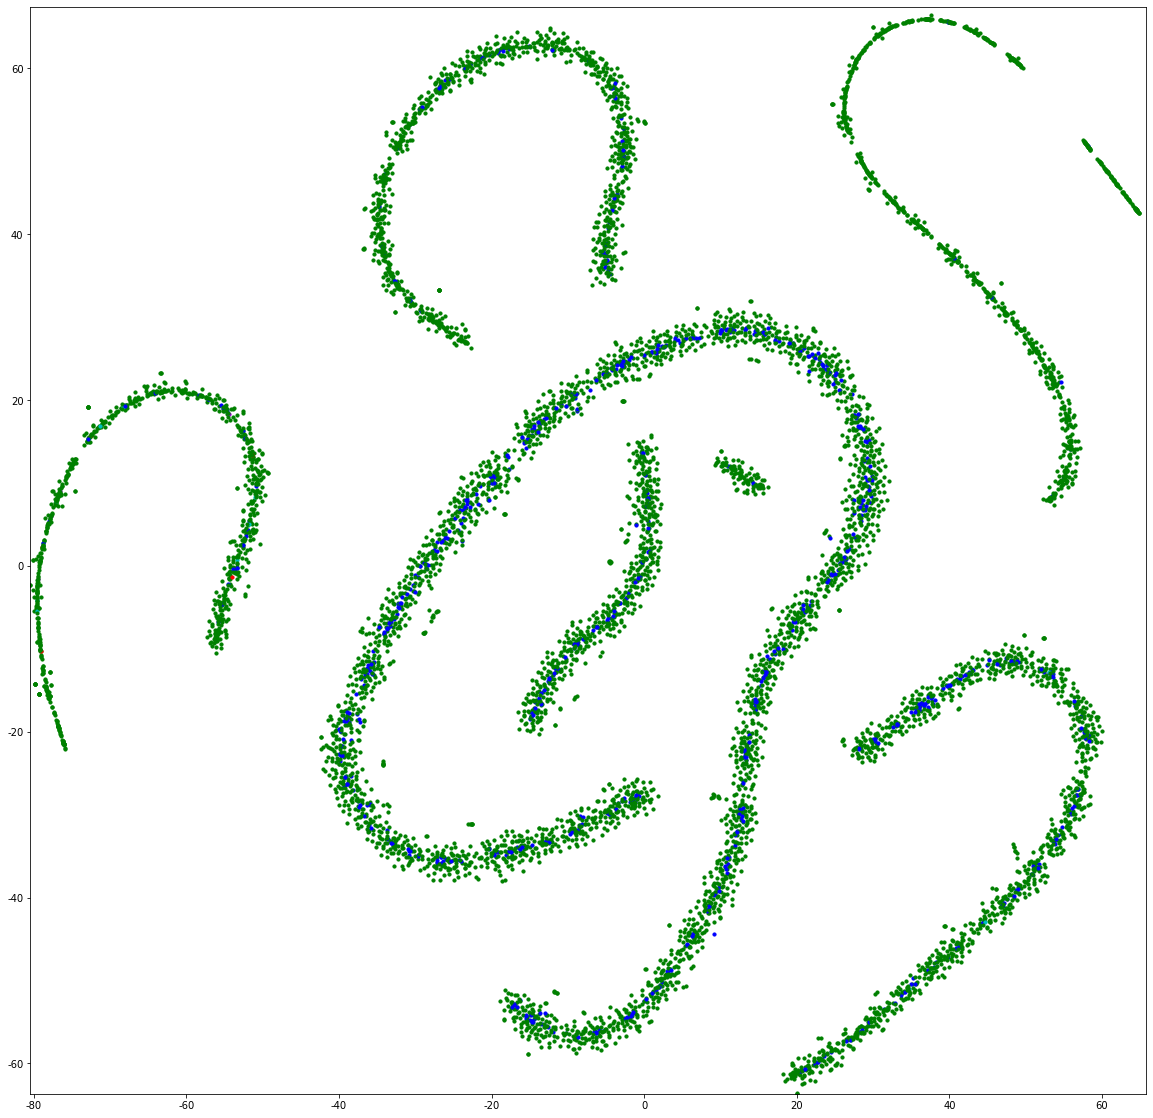

In [25]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

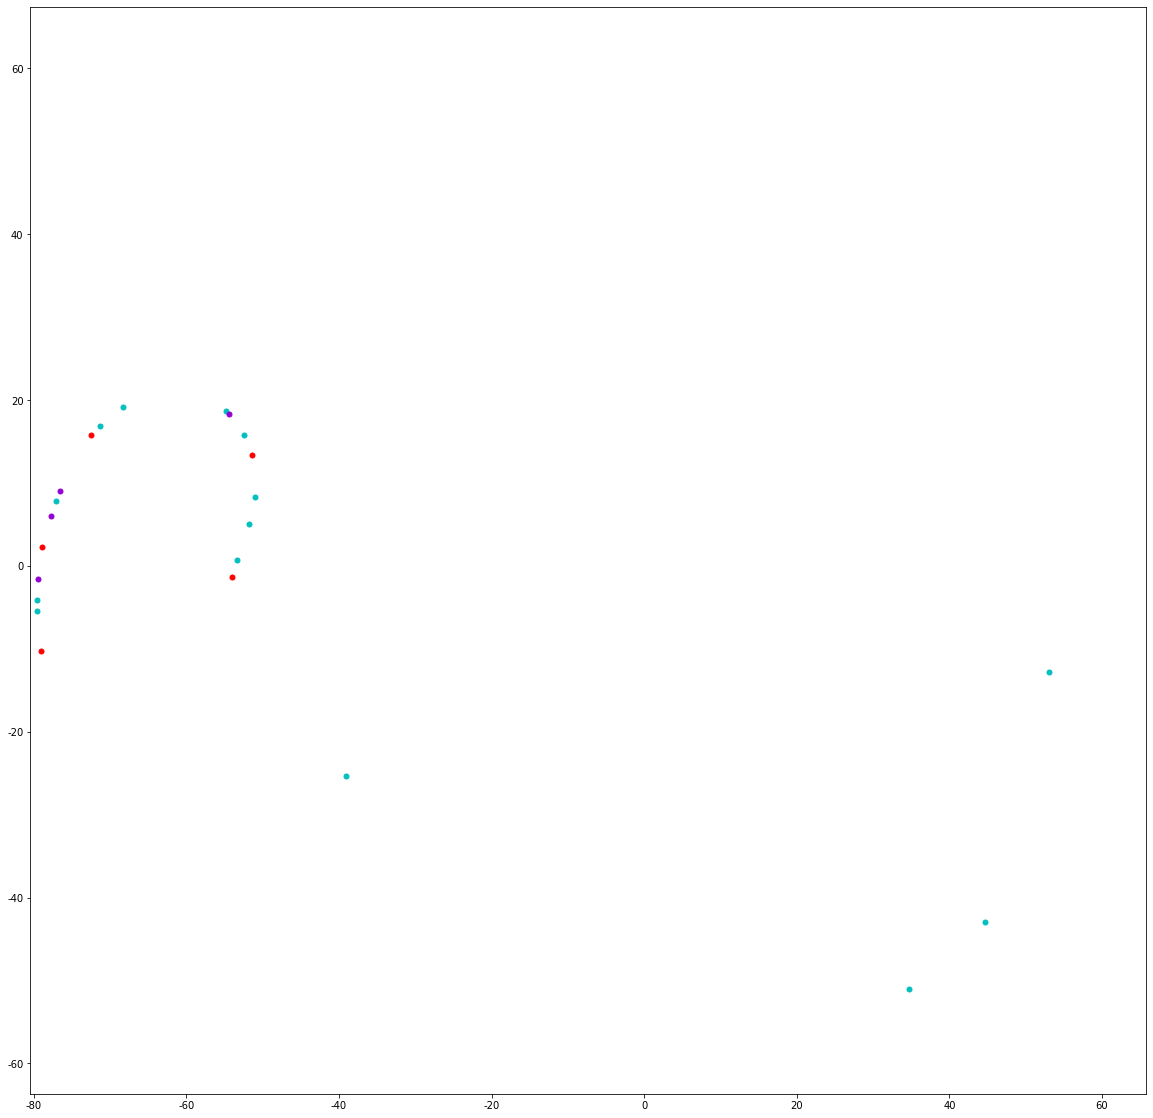

In [26]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 3 or topics_num[i] == 1:
        continue
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    # elif topics_num[i] == 3:
        # color = 'b'
    # else:
        # color = 'g'
        
    size = 25
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

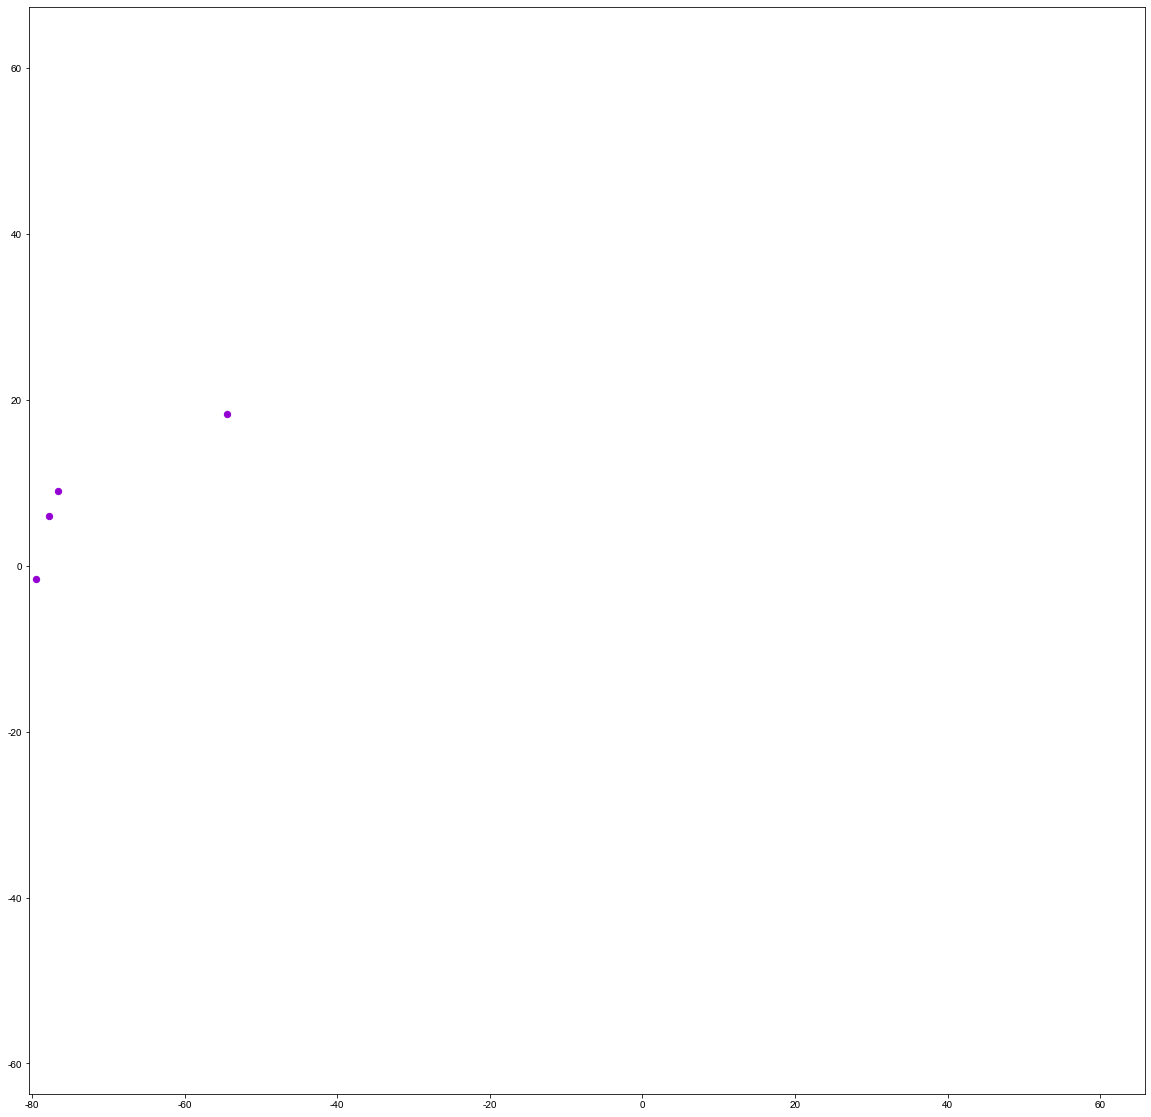

In [109]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 3 or topics_num[i] == 1:
        continue
    if topics_num[i] == 10:
        color = 'darkviolet'
        
        size = 40
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

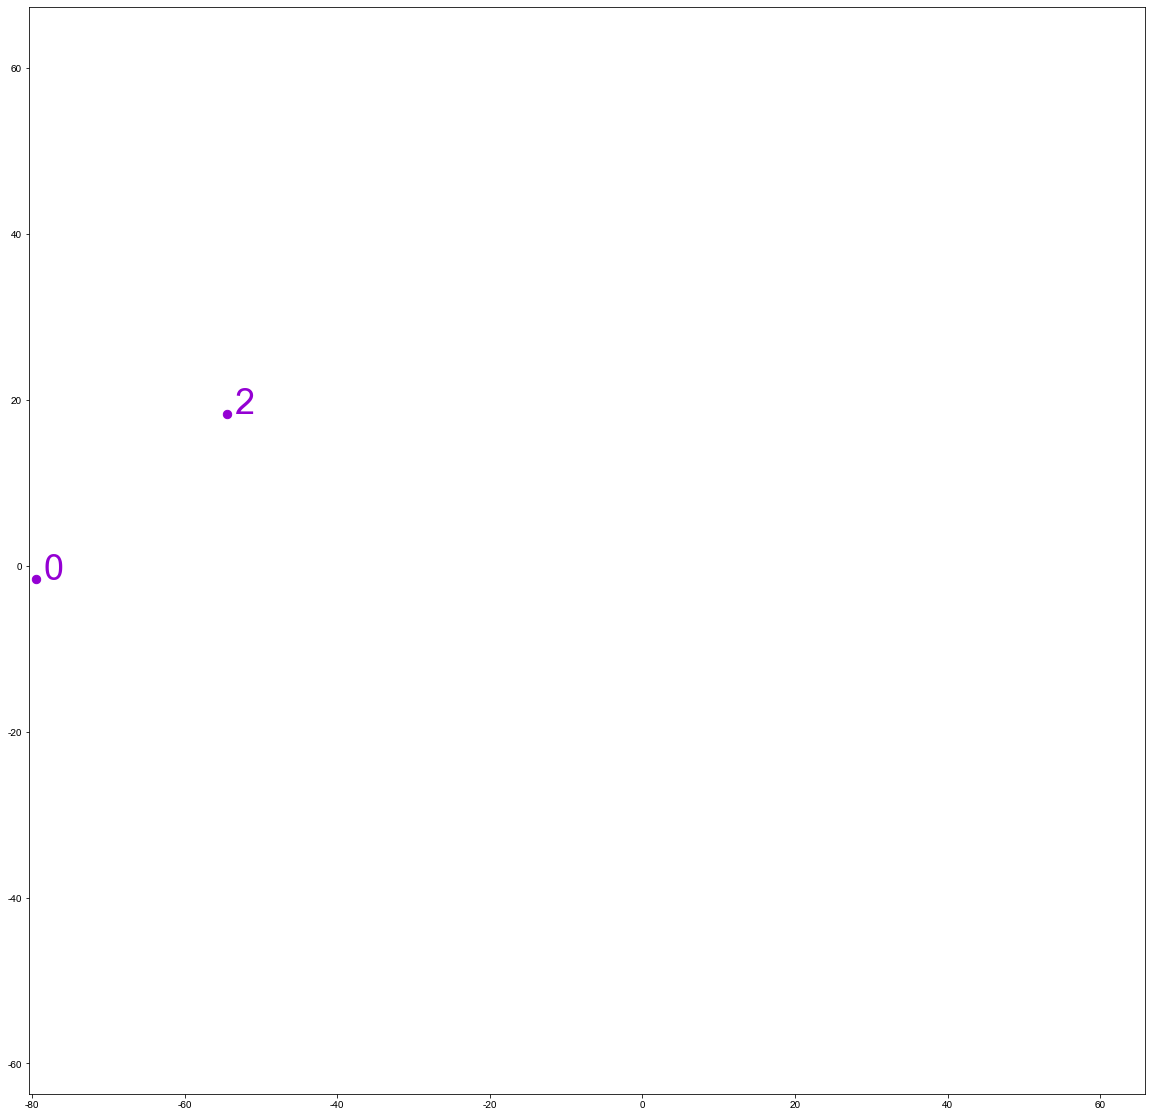

In [116]:
communities_10 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'darkviolet'

size = 70

word_files = []
weight_files = []

for i in range(len(data)):
    if topics_num[i] == 10:
        if data_tsne[i,1] < 0 or data_tsne[i,0] > -55:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            plt.annotate(sorted_filenames_tws[i].split('_')[1], (data_tsne[i,0]+1, data_tsne[i,1]), fontsize=36, c=color)
            communities_10.append([[sorted_filenames_tws[i]], [sorted_filenames_weights[i]]])

In [117]:
idx = 1

for count in zip(word_weight_sum(communities_10[0]), word_weight_sum(communities_10[1])):
    print(f'{idx}: {count}')
    print()
    idx += 1

community number: 0
community number: 2
1: (('life', 0.141), ('dae', 0.127))

2: (('friend', 0.091), ('need', 0.066))

3: (('today', 0.089), ('bpd', 0.055))

4: (('depression', 0.08), ('therapist', 0.051))

5: (('suicide', 0.08), ('therapy', 0.043))

6: (('year', 0.074), ('life', 0.043))

7: (('kill', 0.074), ('time', 0.041))

8: (('hate', 0.064), ('day', 0.034))

9: (('birthday', 0.063), ('bipolar', 0.034))

10: (('alone', 0.06), ('friend', 0.033))

11: (('need', 0.056), ('advice', 0.032))

12: (('day', 0.053), ('hate', 0.031))

13: (('die', 0.053), ('relationship', 0.029))

14: (('think', 0.051), ('parent', 0.028))

15: (('wish', 0.046), ('mental', 0.028))

16: (('talk', 0.044), ('anxiety', 0.027))

17: (('happy', 0.042), ('year', 0.026))

18: (('love', 0.04), ('schizophrenia', 0.026))

19: (('lonely', 0.039), ('love', 0.026))

20: (('suicidal', 0.038), ('today', 0.026))

21: (('one', 0.037), ('abuse', 0.024))

22: (('fuck', 0.037), ('first', 0.021))

23: (('never', 0.037), ('even', 

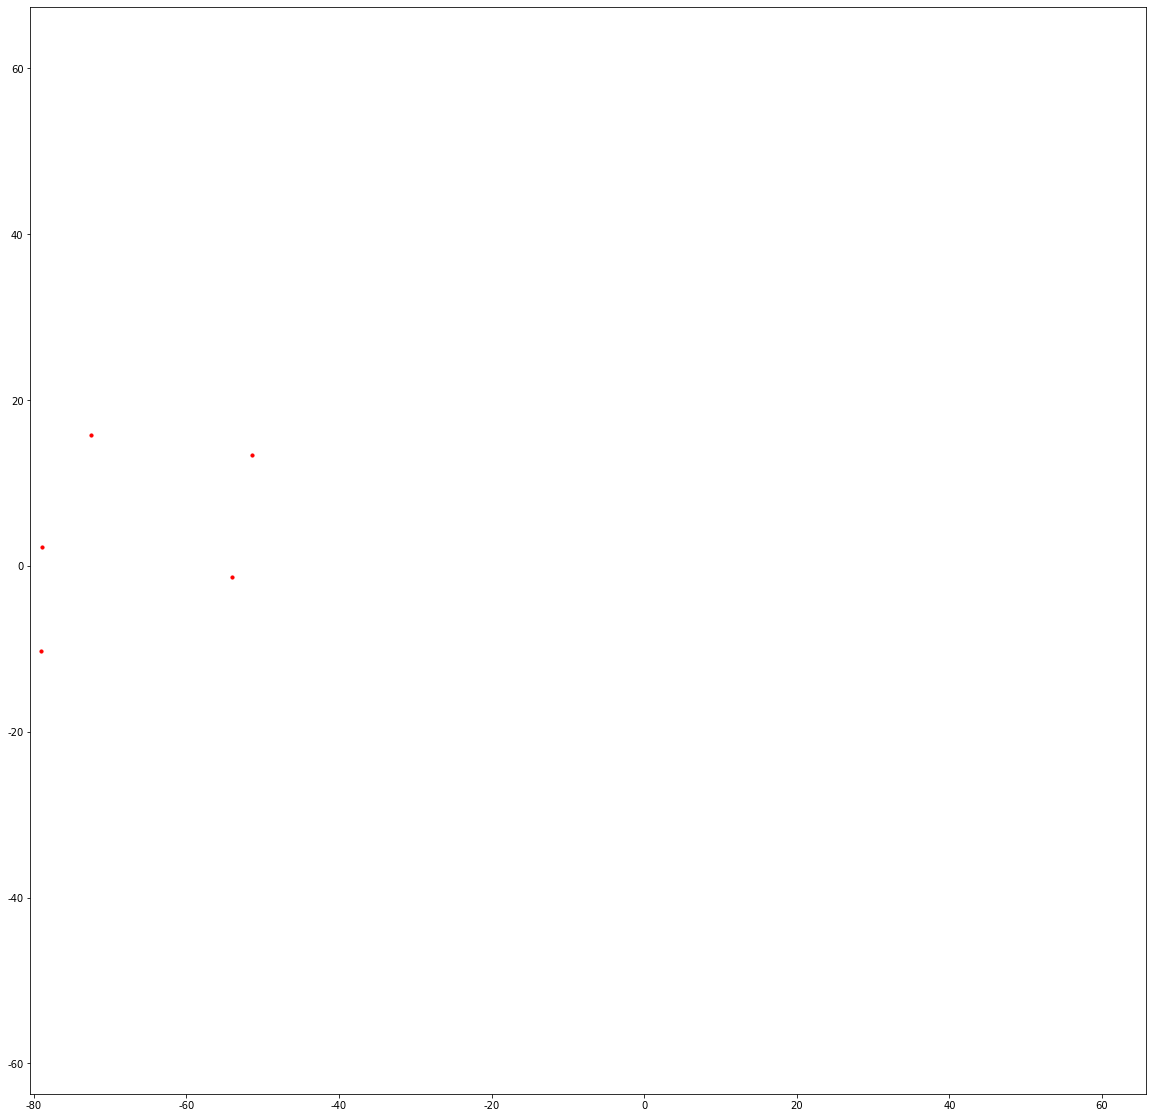

In [34]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 5:
        color = 'r'
        size = 10
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

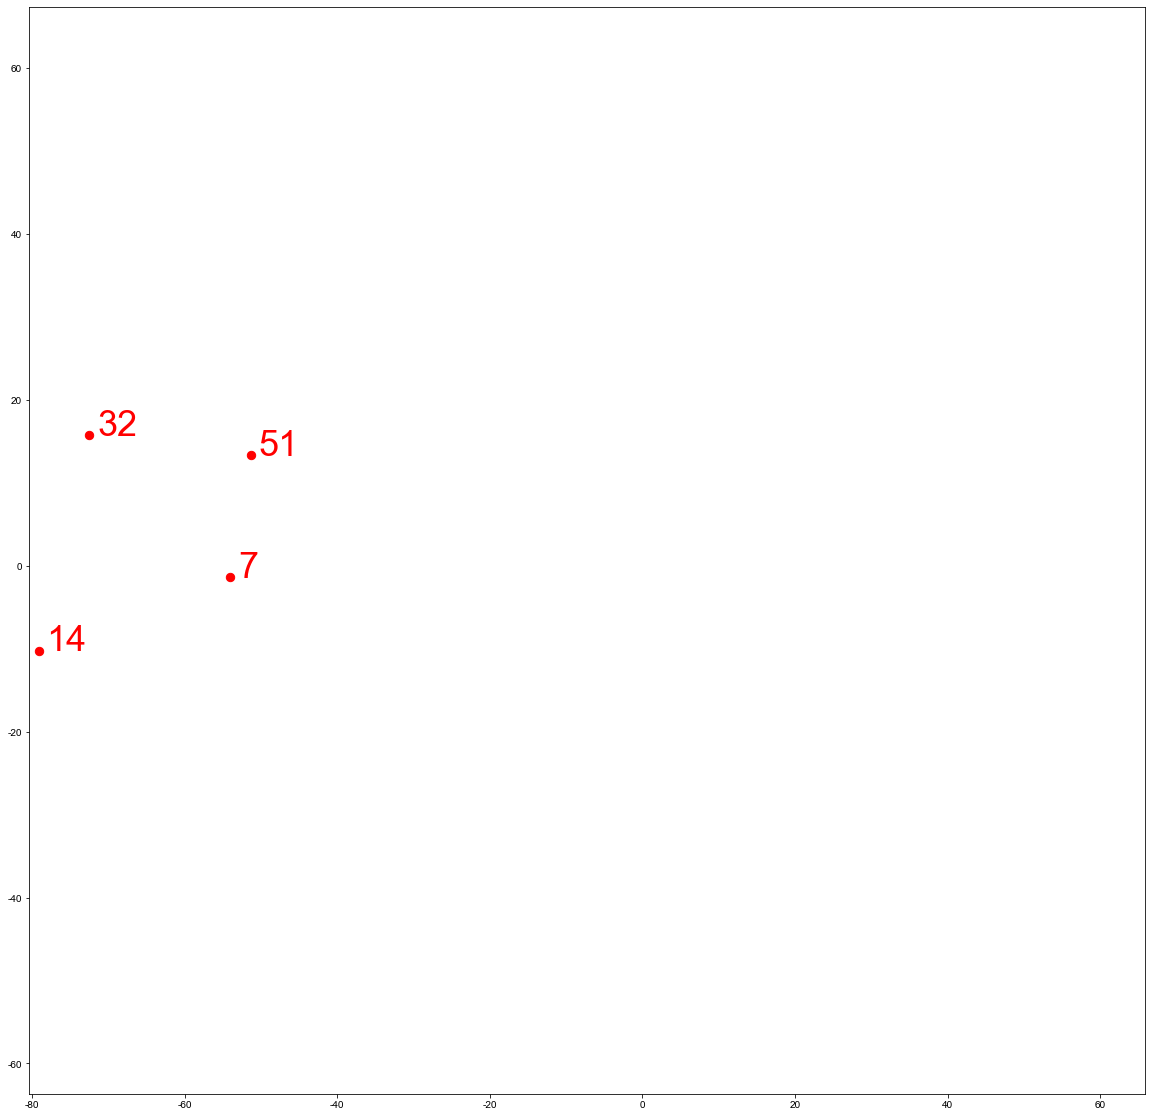

In [118]:
communities_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,1] > 15 or data_tsne[i,1] < -9 or data_tsne[i,0] > -52 or (data_tsne[i,0] > -60 and data_tsne[i,1] < 0):
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            plt.annotate(sorted_filenames_tws[i].split('_')[1], (data_tsne[i,0]+1, data_tsne[i,1]), fontsize=36, c=color)
            communities_5.append([[sorted_filenames_tws[i]], [sorted_filenames_weights[i]]])

In [119]:
idx = 1

for count in zip(word_weight_sum(communities_5[0]), word_weight_sum(communities_5[1]), 
                 word_weight_sum(communities_5[2]), word_weight_sum(communities_5[3])):
    print(f'{idx}: {count}')
    print()
    idx += 1

community number: 14
community number: 32
community number: 51
community number: 7
1: (('life', 0.047), ('clean', 0.041), ('bullying', 0.087), ('anger', 0.175))

2: (('friend', 0.034), ('friend', 0.039), ('bullied', 0.077), ('angry', 0.099))

3: (('die', 0.033), ('need', 0.033), ('bully', 0.067), ('need', 0.038))

4: (('depression', 0.031), ('year', 0.032), ('need', 0.044), ('stop', 0.023))

5: (('kill', 0.031), ('month', 0.032), ('friend', 0.041), ('advice', 0.021))

6: (('need', 0.03), ('harm', 0.028), ('life', 0.039), ('friend', 0.02))

7: (('suicide', 0.025), ('today', 0.028), ('depression', 0.03), ('issue', 0.016))

8: (('hate', 0.022), ('depression', 0.024), ('die', 0.027), ('life', 0.016))

9: (('suicidal', 0.021), ('stop', 0.023), ('school', 0.026), ('hurt', 0.015))

10: (('time', 0.021), ('time', 0.023), ('suicide', 0.025), ('baby', 0.014))

11: (('think', 0.019), ('day', 0.021), ('think', 0.024), ('year', 0.014))

12: (('talk', 0.017), ('kill', 0.017), ('year', 0.015), ('toda

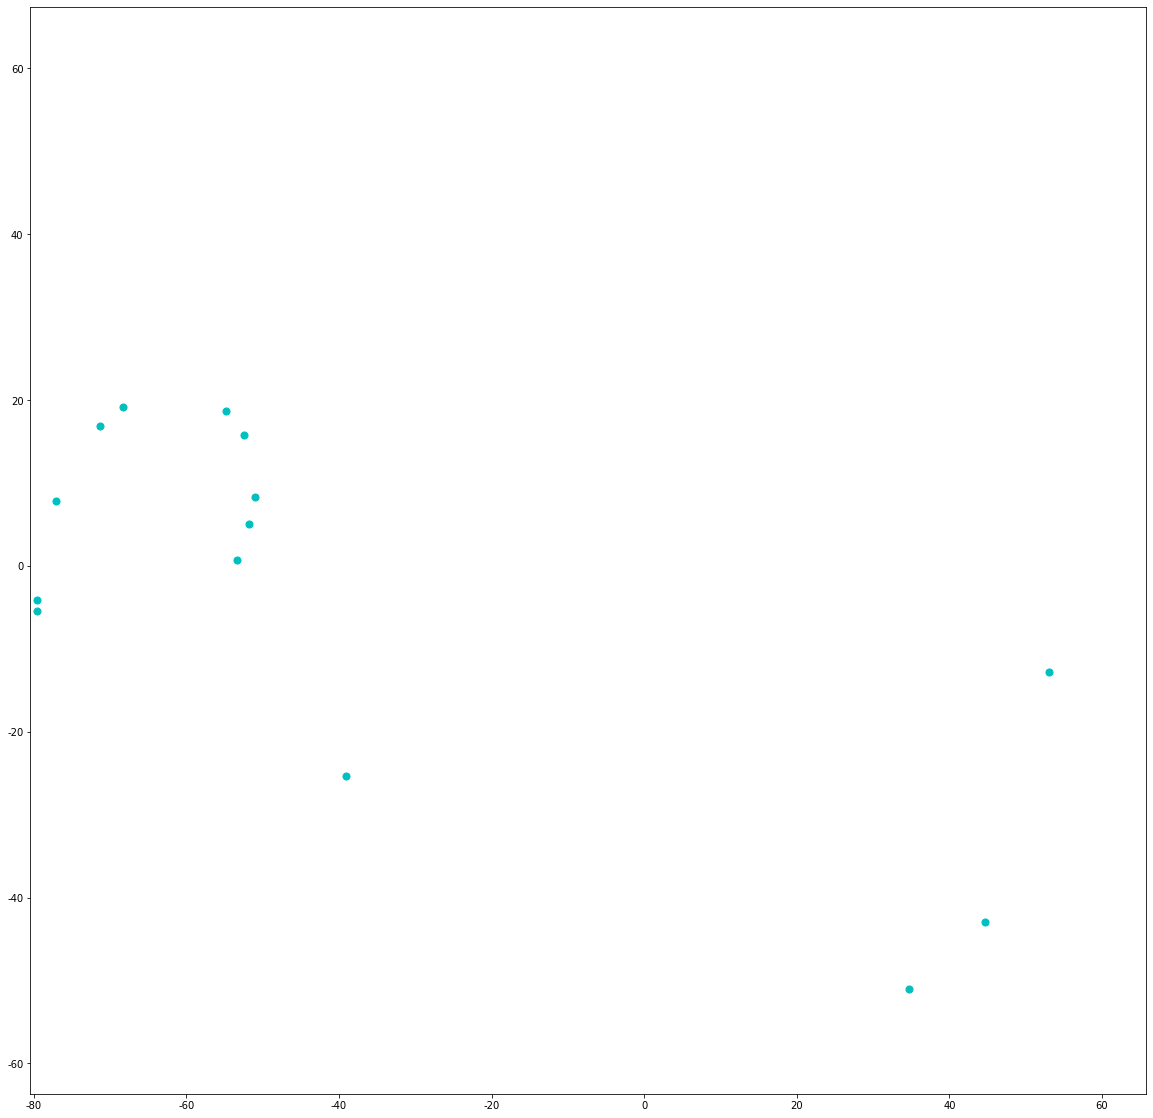

In [78]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)

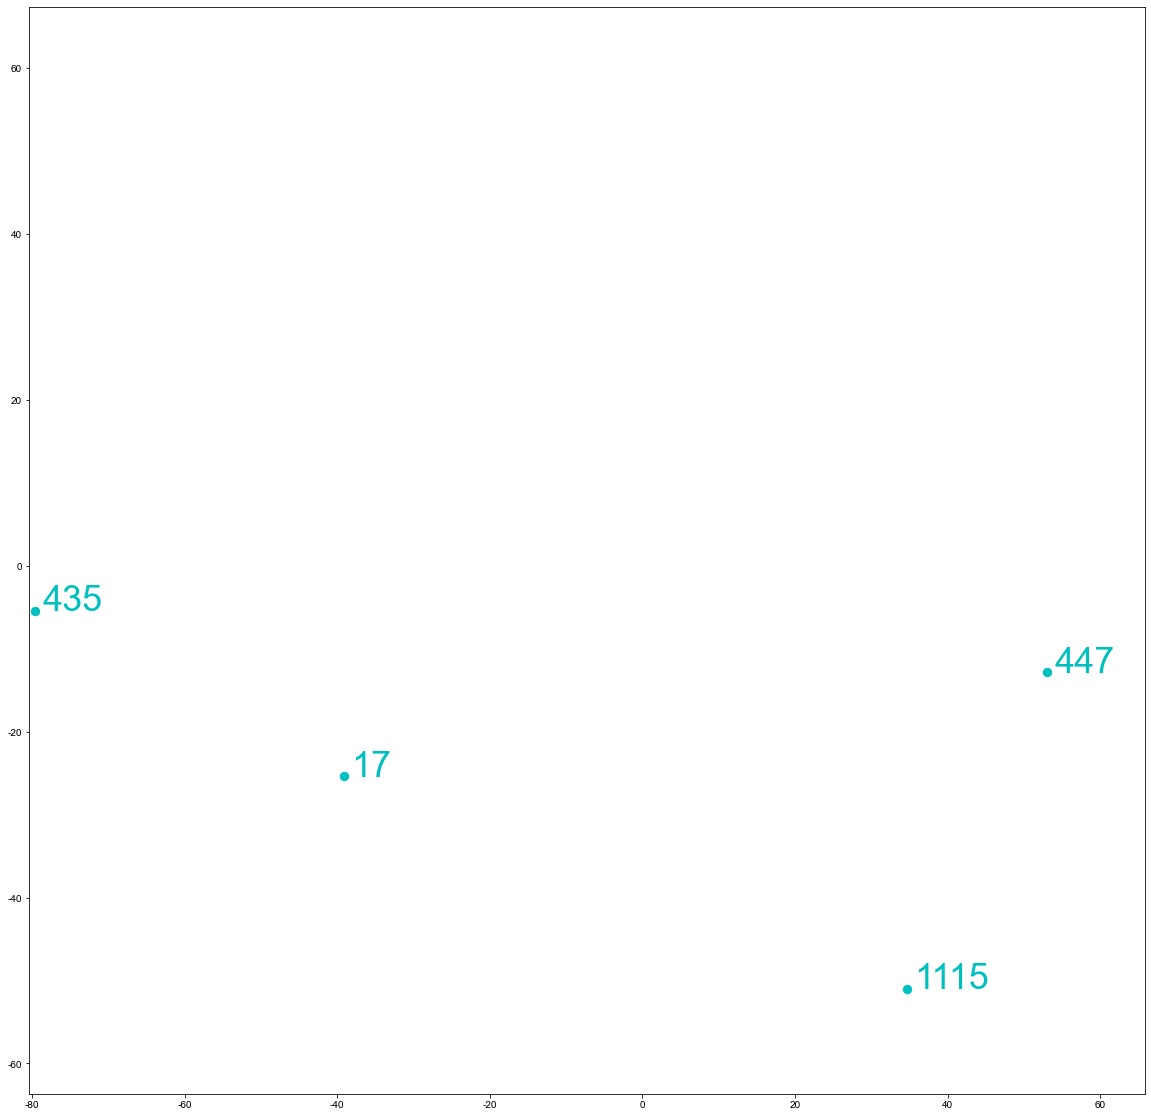

In [128]:
communities_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if (data_tsne[i,0] < -78 and data_tsne[i,1] < -5) or (data_tsne[i,0] < -20 and data_tsne[i,1] < -20) or data_tsne[i,1] < -48 or data_tsne[i,0] > 50:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            plt.annotate(sorted_filenames_tws[i].split('_')[1], (data_tsne[i,0]+1, data_tsne[i,1]), fontsize=36, c=color)
            communities_4.append([[sorted_filenames_tws[i]], [sorted_filenames_weights[i]]])

In [127]:
idx = 1

for count in zip(word_weight_sum(communities_4[0]), word_weight_sum(communities_4[1]), 
                 word_weight_sum(communities_4[2]), word_weight_sum(communities_4[3])):
    print(f'{idx}: {count}')
    print()
    idx += 1

community number: 1115
community number: 17
community number: 435
community number: 447
1: (('order', 0.063), ('hair', 0.086), ('depression', 0.034), ('depression', 0.066))

2: (('subway', 0.063), ('pulling', 0.052), ('need', 0.034), ('kill', 0.045))

3: (('friend', 0.033), ('year', 0.03), ('life', 0.03), ('feeling', 0.035))

4: (('kill', 0.031), ('eyebrow', 0.027), ('depressed', 0.029), ('need', 0.03))

5: (('hey', 0.027), ('trich', 0.025), ('think', 0.02), ('lost', 0.03))

6: (('thought', 0.025), ('eyelash', 0.021), ('friend', 0.02), ('unexist', 0.026))

7: (('depression', 0.023), ('pull', 0.019), ('feeling', 0.018), ('ive', 0.026))

8: (('numb', 0.022), ('stop', 0.019), ('time', 0.017), ('friend', 0.022))

9: (('kid', 0.022), ('left', 0.018), ('hi', 0.016), ('hate', 0.02))

10: (('suicidal', 0.022), ('head', 0.016), ('nail', 0.016), ('reddit', 0.019))

11: (('hate', 0.021), ('bad', 0.016), ('mom', 0.015), ('taking', 0.018))

12: (('need', 0.019), ('day', 0.015), ('tired', 0.015), ('

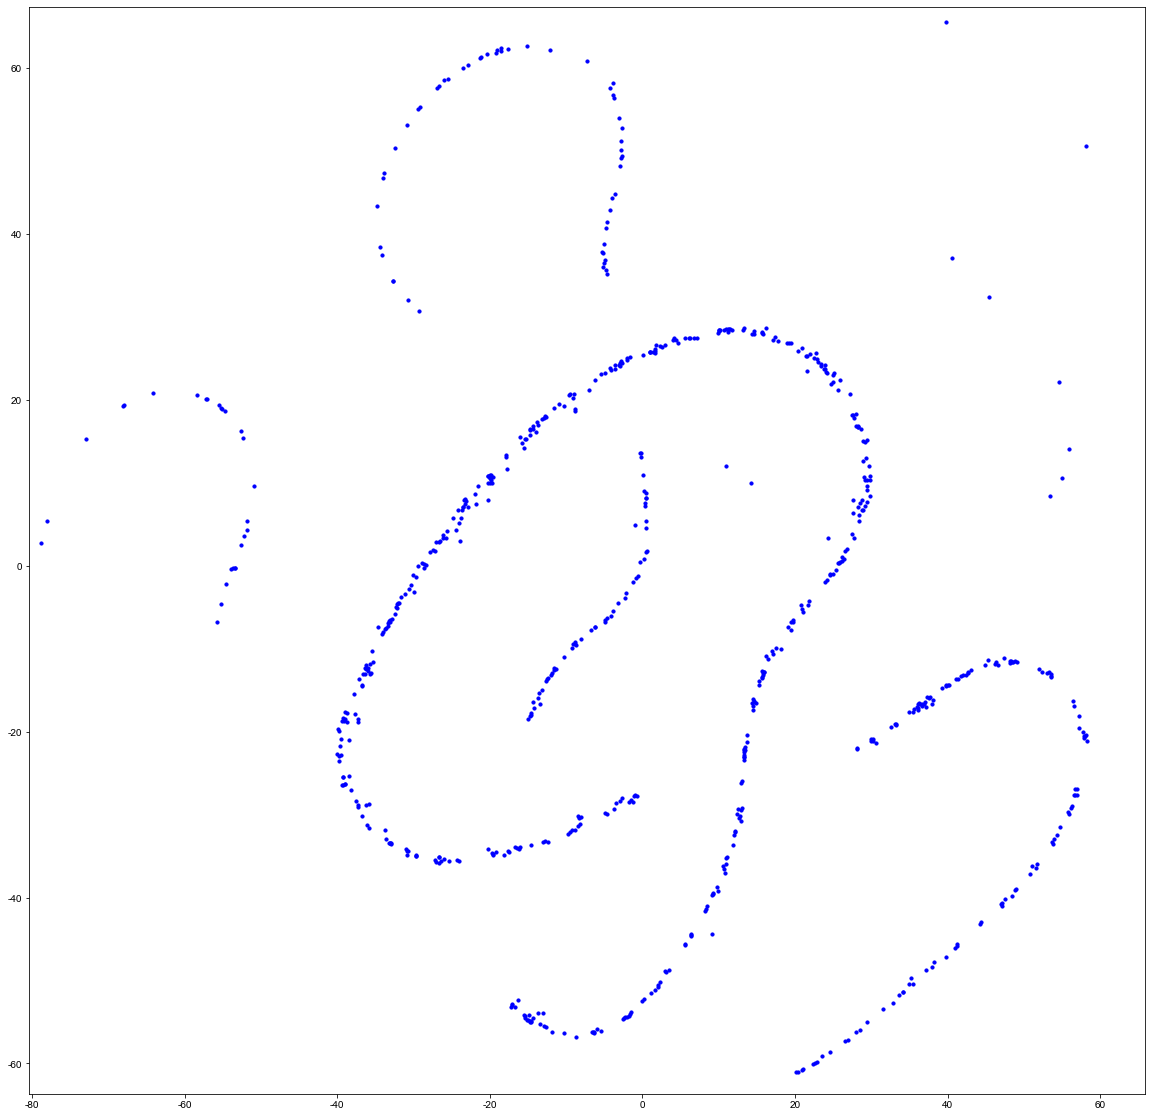

In [130]:
communities_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=10)
        # plt.annotate(sorted_filenames_tws[i].split('_')[1], (data_tsne[i,0]+1, data_tsne[i,1]), fontsize=36, c=color)

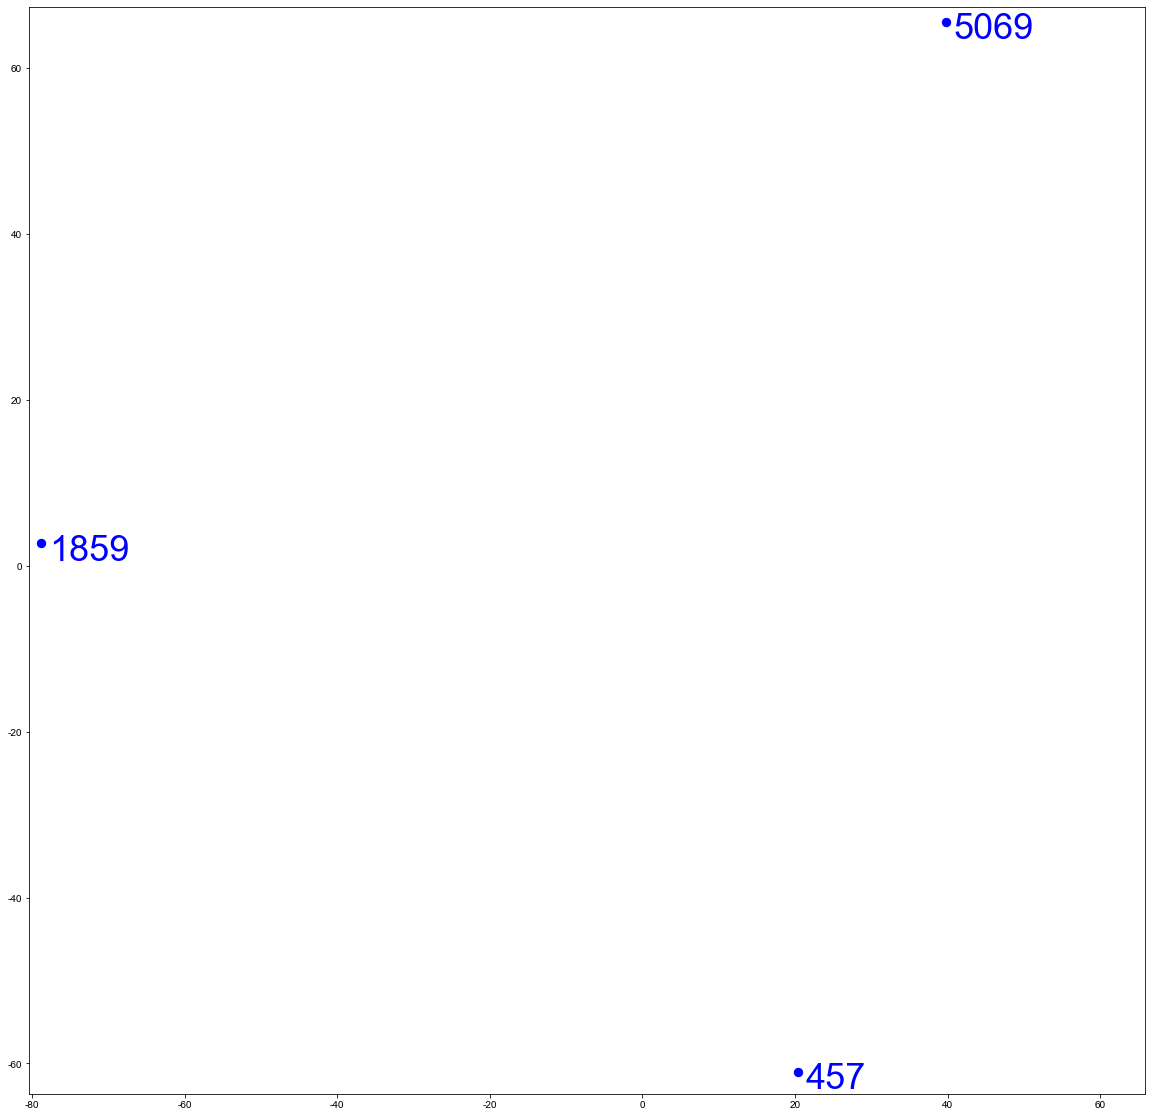

In [142]:
communities_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] < -78 or data_tsne[i,1] > 64 or data_tsne[i,1] < -61:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            plt.annotate(sorted_filenames_tws[i].split('_')[1], (data_tsne[i,0]+1, data_tsne[i,1]-2), fontsize=36, c=color)
            communities_3.append([[sorted_filenames_tws[i]], [sorted_filenames_weights[i]]])

In [143]:
idx = 1

for count in zip(word_weight_sum(communities_3[0]), word_weight_sum(communities_3[1]), 
                 word_weight_sum(communities_3[2])):
    print(f'{idx}: {count}')
    print()
    idx += 1

community number: 1859
community number: 457
community number: 5069
1: (('life', 0.05), ('fight', 0.042), ('marina', 0.751))

2: (('anxiety', 0.046), ('person', 0.028), ('okay', 0.75))

3: (('night', 0.033), ('die', 0.023), ('hotforwords', 0.75))

4: (('kill', 0.033), ('suicide', 0.023), ('orlova', 0.749))



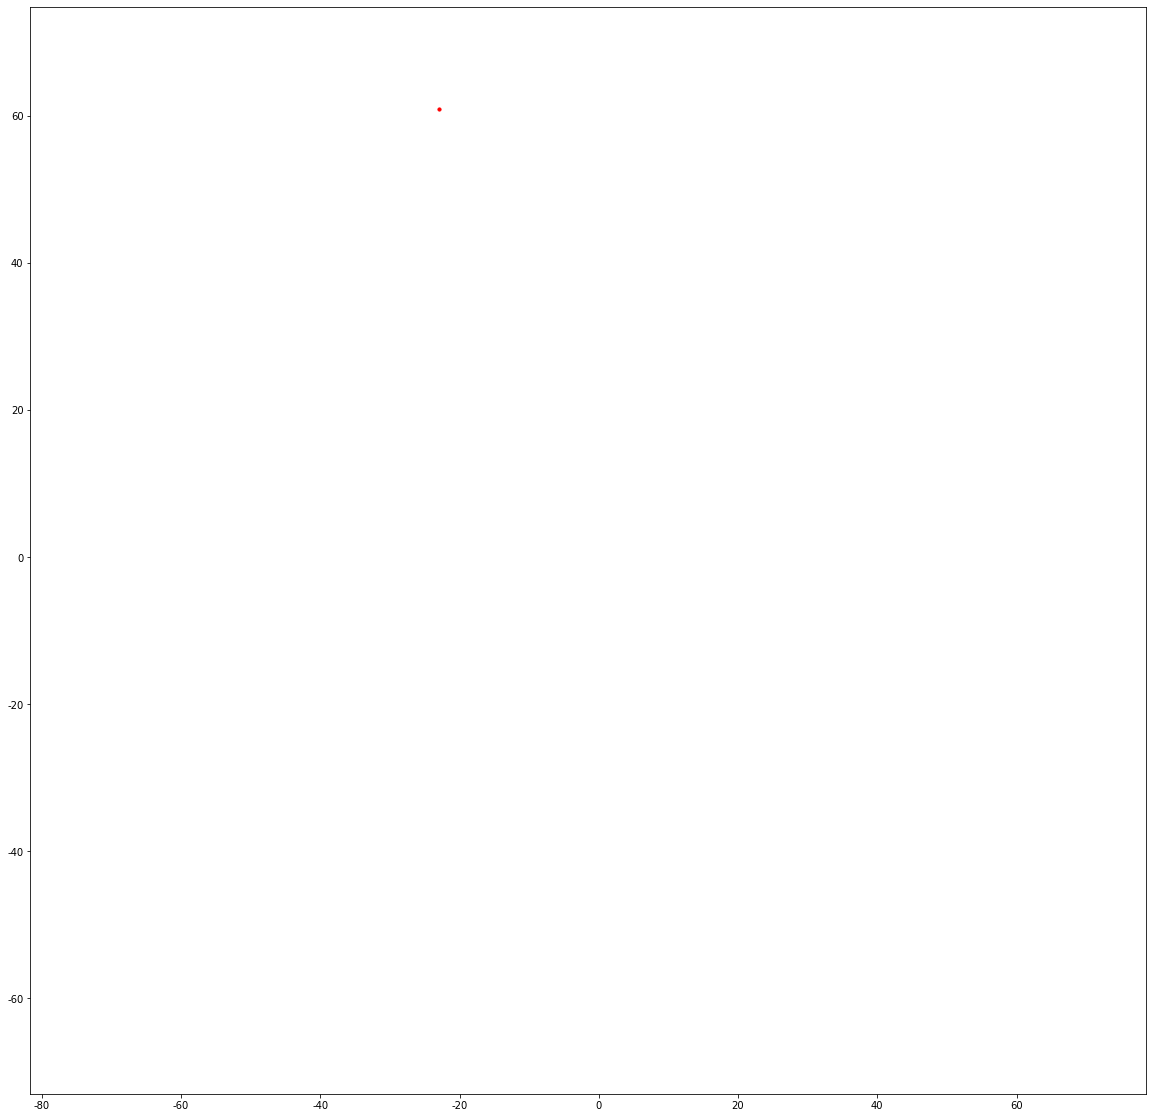

In [15]:
communities = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,1]> 50:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities.append(filenames[i])

In [18]:
word_count_and_tf_idf_similarity(communities, 4)

[('feeling', 2.0),
 ('depression', 2.0),
 ('idk', 1.0),
 ('taking', 1.0),
 ('future', 1.0),
 ('always', 1.0),
 ('probably', 1.0),
 ('motivation', 1.0),
 ('wait', 1.0),
 ('bright', 1.0),
 ('post', 1.0),
 ('thought', 1.0),
 ('m15', 1.0),
 ('hate', 1.0),
 ('ill', 1.0),
 ('never', 1.0),
 ('unexist', 1.0),
 ('problem', 1.0),
 ('one', 1.0),
 ('hug', 1.0),
 ('antidepressant', 1.0),
 ('kill', 1.0),
 ('wonâ€™t', 1.0),
 ('first', 1.0),
 ('showing', 1.0),
 ('experience', 1.0),
 ('put', 1.0),
 ('reddit', 1.0),
 ('need', 1.0),
 ('lost', 1.0),
 ('ive', 1.0),
 ('iâ€˜m', 1.0),
 ('lot', 1.0),
 ('literally', 1.0),
 ('friend', 1.0),
 ('gambling', 1.0),
 ('start', 1.0),
 ('anxiety', 1.0)]

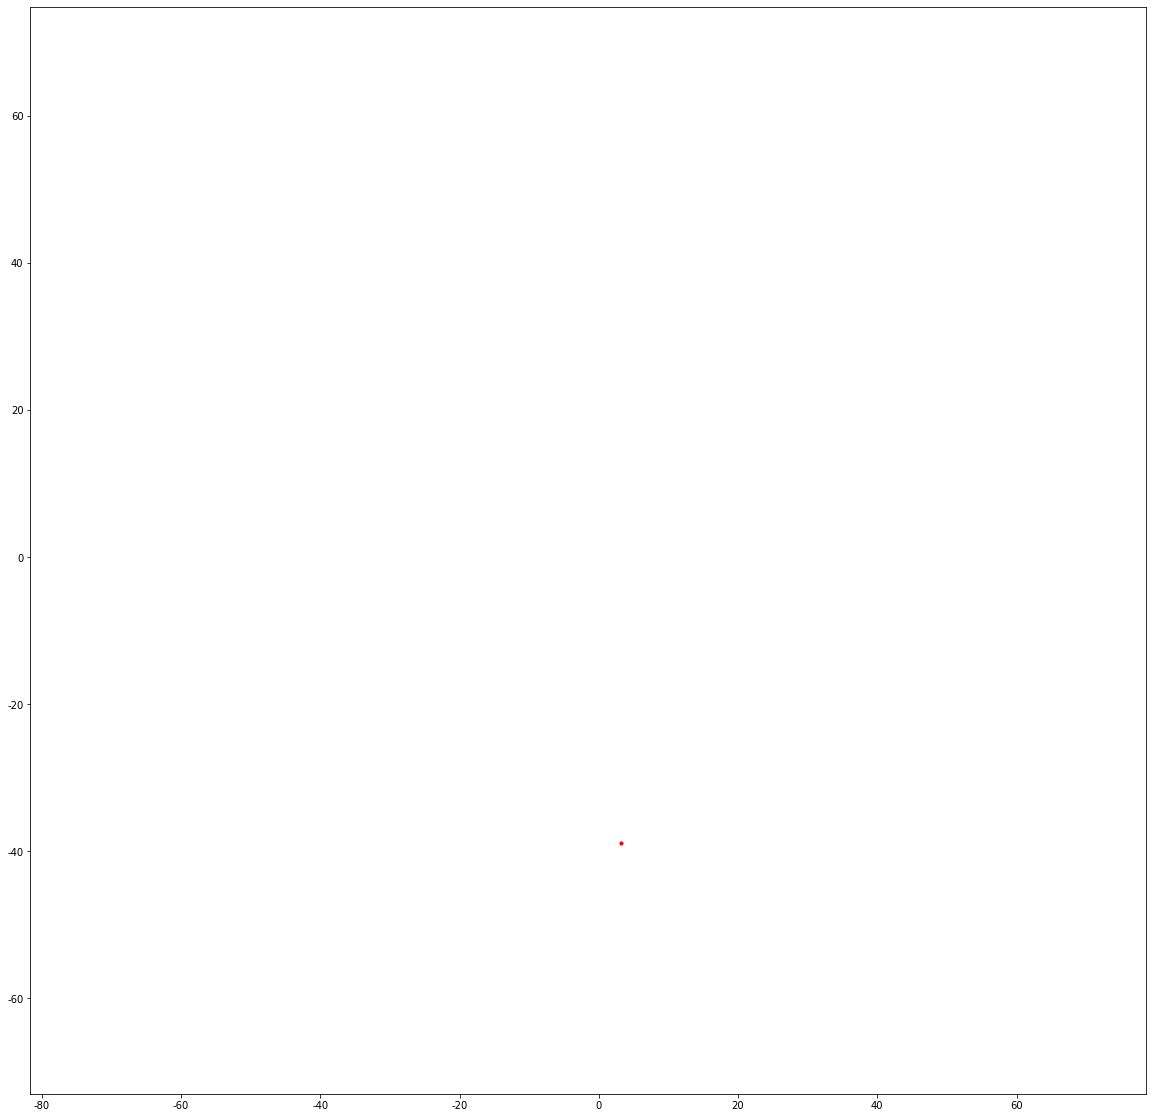

In [19]:
communities2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,1]< -38:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities2.append(filenames[i])

In [20]:
word_count_and_tf_idf_similarity(communities2, 5)

[('think', 2.0),
 ('suicide', 2.0),
 ('hate', 2.0),
 ('suicidal', 2.0),
 ('life', 2.0),
 ('today', 2.0),
 ('kill', 2.0),
 ('need', 2.0),
 ('time', 2.0),
 ('friend', 2.0),
 ('right', 1.0),
 ('sad', 1.0),
 ('feeling', 1.0),
 ('lonely', 1.0),
 ('this', 1.0),
 ('thought', 1.0),
 ('relationship', 1.0),
 ('alone', 1.0),
 ('shit', 1.0),
 ('christmas', 1.0),
 ('even', 1.0),
 ('advice', 1.0),
 ('hour', 1.0),
 ('end', 1.0),
 ('one', 1.0),
 ('done', 1.0),
 ('worst', 1.0),
 ('depression', 1.0),
 ('depressed', 1.0),
 ('talk', 1.0),
 ('year', 1.0),
 ('go', 1.0),
 ('die', 1.0),
 ('killing', 1.0),
 ('ive', 1.0),
 ('lost', 1.0),
 ('love', 1.0),
 ('fuck', 1.0),
 ('day', 1.0),
 ('alive', 1.0)]

In [17]:
all_tw = []
for filename in filenames:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        all_tw.append(topics)
        
all_tw = list(set(sum(all_tw, [])))
all_tw_rst = [all_tw]

print(all_tw_rst)

[['foodâ€\x9d', 'yknow', 'sexy', 'avid', 'scholarship', 'measured', 'lorry', 'gained', 'study', 'furry', 'steal', 'phenomenal', 'ignorantly', '2hour', 'bee', 'fous', 'urine', 'horny', '150mg', 'ill', 'strange', 'firearm', 'agree', 'blog', 'hiccup', 'judge', 'luvox', 'masturbating', 'endlessly', 'whereâ€™s', 'opinionsadvice', 'interest', 'toshare', 'flexibility', 'handing', 'angst', 'messing', 'manipulative', 'taught', 'enoughenough', 'â€œsomethingâ€\x9d', 'additionally', 'suppose', 'entertain', 'niquil', 'isolate', 'unloved', 'aid', 'spell', 'starting', 'brown', 'asf', 'intelligent', 'rapist', 'several', 'howwhere', 'bodily', 'paper', 'sensitive', 'flunking', 'remind', 'confirmed', 'mailbox', 'effectively', 'censor', 'my', 'hcg', 'scroll', 'boundary', 'sexist', 'order', 'party', 'replaceable', 'idgaf', 'preventive', 'sloppiness', 'matchâ€™', 'morbid', 'flashback', 'mark', 'terrified', 'complex', 'painlesseasy', 'except', 'awful', 'saddens', 'warning', 'before', 'harmed', 'fictional', '

In [19]:
mean_vector_list = []
topics_num = []

# print(all_tw)

model = Word2Vec(all_tw_rst, min_count=1)

for filename in filenames:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        tws = list(reader)
        topics_num.append(len(tws))
        
        tws = sum(tws, [])
        # print(tws)
        
        word_vector_list = []
        mean_vector = []
        word_vectors = model.wv
        
        for tw in tws:
            word_vector_list.append(word_vectors[tw].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [20]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[ 3.17781626e-03  6.22403224e-03 -3.11979834e-03 ... -8.55249735e-04
  -1.57357560e-03  1.29031730e-03]
 [-2.72758122e-03  1.09690544e-03 -1.98628681e-03 ... -1.07897050e-03
  -2.44814320e-05  2.13863630e-03]
 [ 1.39900867e-04 -1.39332029e-03  8.73743091e-04 ... -9.38271452e-04
  -2.35323529e-03  4.72018564e-03]
 ...
 [-6.76733468e-04  1.44238178e-03 -4.57426300e-04 ...  5.60303542e-04
  -8.20320976e-04 -3.16317857e-03]
 [-6.23899221e-04 -1.43003976e-04  4.12664274e-03 ... -9.12779558e-04
  -3.53354566e-03 -9.19955783e-05]
 [-7.61171512e-04  4.23560617e-04  4.55376464e-03 ...  2.77899578e-04
  -1.51569588e-03  1.81479733e-03]]


In [21]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[ 3.17781626e-03  6.22403224e-03 -3.11979834e-03 ... -8.55249735e-04
  -1.57357560e-03  1.29031730e-03]
 [-2.72758122e-03  1.09690544e-03 -1.98628681e-03 ... -1.07897050e-03
  -2.44814320e-05  2.13863630e-03]
 [ 1.39900867e-04 -1.39332029e-03  8.73743091e-04 ... -9.38271452e-04
  -2.35323529e-03  4.72018564e-03]
 ...
 [-6.76733468e-04  1.44238178e-03 -4.57426300e-04 ...  5.60303542e-04
  -8.20320976e-04 -3.16317857e-03]
 [-6.23899221e-04 -1.43003976e-04  4.12664274e-03 ... -9.12779558e-04
  -3.53354566e-03 -9.19955783e-05]
 [-7.61171512e-04  4.23560617e-04  4.55376464e-03 ...  2.77899578e-04
  -1.51569588e-03  1.81479733e-03]]
[[ 7.597471   -0.6036954 ]
 [ 3.924985    9.003994  ]
 [ 2.9187694   5.9312716 ]
 ...
 [ 0.70320207  9.891562  ]
 [ 2.3797045  -0.27507505]
 [ 0.80564064 -0.9815685 ]]


In [21]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    # else:
        # color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

KeyboardInterrupt: 

## global all topic words list

In [370]:
def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

all_topic_words = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        s_tw = set(topics)
        all_topic_words.append(topics)
        
all_topic_words_from_all_files = sum(all_topic_words, [])
print(len(all_topic_words_from_all_files))

82795


In [17]:
def word_count_and_tf_idf_similarity(filenames, topic_num, print_word_count=False, average=True):
    all_topic_words = []
    len_files = len(filenames)
    
    
    # print(f'topic_num: {topic_num}')
    # print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        if average:
            atw_count_list.append([tw, float(round(all_topic_words.count(tw) / len_files, 4))])
        else:
            atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    #print('all topic words count')
    #print(all_sorted_dict)
    #print()
    
    # print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    # print()
    # print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    # print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')
    
    return all_sorted_dict

# number of topic 10 and 5 and 4

## topic_nums = 10 (members >= 10000)

In [384]:
communities_10 = []
communities_5 = []
communities_4 = []


for i in range(len(data)):
    if topics_num[i] == 10:
        communities_10.append(filenames[i])
    elif topics_num[i] == 5:
        communities_5.append(filenames[i])
    elif topics_num[i] == 4:
        communities_4.append(filenames[i])

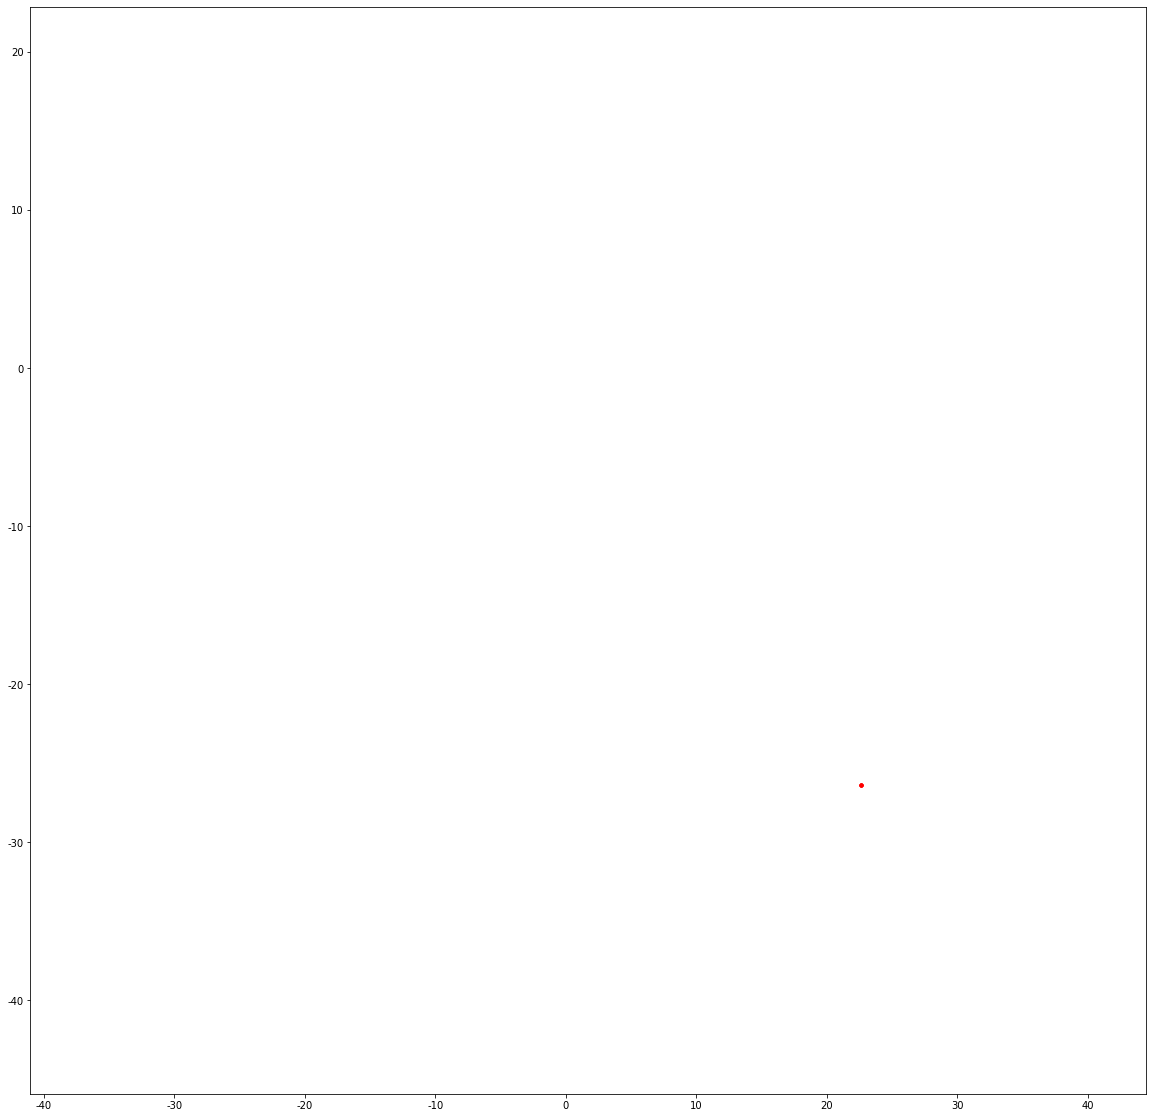

In [368]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 10:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [440]:
print(word_count_and_tf_idf_similarity(communities_10, 10))

[('life', 2.75),
 ('year', 2.25),
 ('today', 2.0),
 ('think', 1.75),
 ('need', 1.5),
 ('one', 1.5),
 ('hate', 1.5),
 ('anxiety', 1.25),
 ('thought', 1.25),
 ('first', 1.25),
 ('depression', 1.25),
 ('friend', 1.25),
 ('time', 1.25),
 ('stop', 1.0),
 ('depressed', 1.0),
 ('day', 1.0),
 ('even', 1.0),
 ('talk', 1.0),
 ('love', 1.0),
 ('tell', 1.0),
 ('go', 1.0),
 ('wish', 1.0),
 ('alone', 1.0),
 ('cry', 1.0),
 ('dae', 1.0),
 ('kill', 1.0),
 ('sleep', 0.75),
 ('advice', 0.75),
 ('best', 0.75),
 ('care', 0.75),
 ('lost', 0.75),
 ('better', 0.75),
 ('old', 0.75),
 ('suicide', 0.75),
 ('this', 0.75),
 ('finally', 0.75),
 ('mom', 0.75),
 ('therapist', 0.75),
 ('wrong', 0.75),
 ('relationship', 0.75),
 ('work', 0.75),
 ('sad', 0.75),
 ('suicidal', 0.75),
 ('job', 0.75),
 ('right', 0.75),
 ('parent', 0.75),
 ('feeling', 0.75),
 ('you', 0.75),
 ('therapy', 0.75),
 ('mental', 0.75),
 ('made', 0.75),
 ('week', 0.75),
 ('person', 0.75),
 ('fuck', 0.75),
 ('birthday', 0.75),
 ('tired', 0.75),
 ('cou

## topic_nums = 5 (members >= 1000)

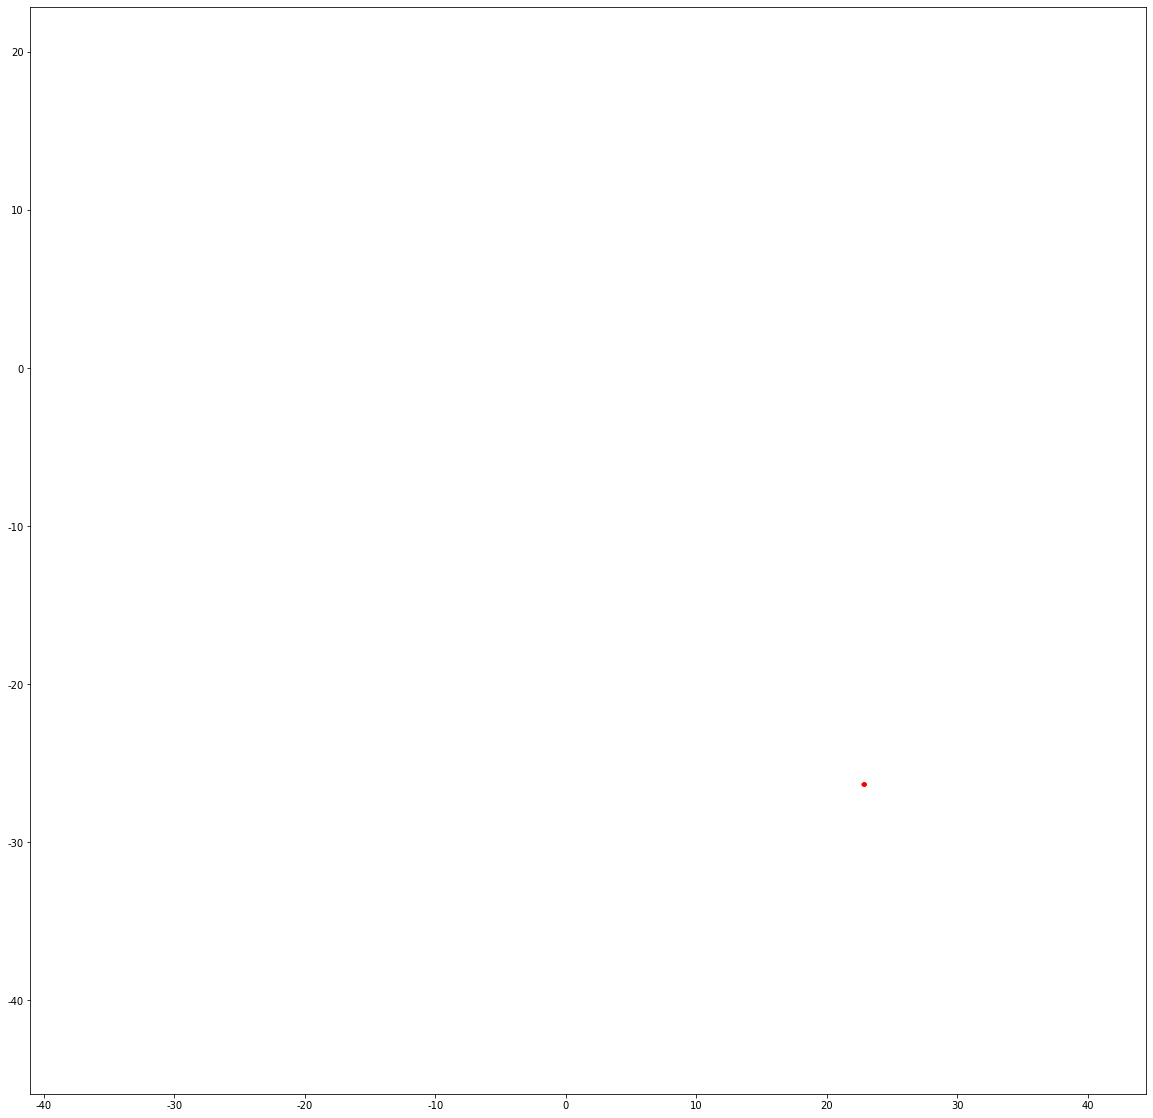

In [367]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 5:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)

plt.show()

In [441]:
word_count_and_tf_idf_similarity(communities_5, 5)

[('friend', 2.0),
 ('need', 1.8),
 ('life', 1.6),
 ('think', 1.6),
 ('depression', 1.4),
 ('time', 1.4),
 ('suicide', 1.2),
 ('today', 1.2),
 ('year', 1.2),
 ('kill', 1.2),
 ('advice', 1.0),
 ('one', 1.0),
 ('day', 1.0),
 ('angry', 1.0),
 ('go', 1.0),
 ('hate', 1.0),
 ('anger', 1.0),
 ('bullied', 0.8),
 ('stop', 0.8),
 ('bully', 0.8),
 ('bullying', 0.8),
 ('depressed', 0.8),
 ('feeling', 0.8),
 ('anxiety', 0.6),
 ('die', 0.6),
 ('suicidal', 0.6),
 ('thought', 0.6),
 ('fuck', 0.6),
 ('lost', 0.4),
 ('this', 0.4),
 ('month', 0.4),
 ('hurt', 0.4),
 ('harm', 0.4),
 ('existential', 0.4),
 ('say', 0.4),
 ('sad', 0.4),
 ('much', 0.4),
 ('school', 0.4),
 ('living', 0.4),
 ('end', 0.4),
 ('person', 0.4),
 ('crisis', 0.4),
 ('tired', 0.4),
 ('lonely', 0.4),
 ('find', 0.4),
 ('clean', 0.4),
 ('guy', 0.4),
 ('death', 0.2),
 ('mad', 0.2),
 ('universe', 0.2),
 ('stand', 0.2),
 ('music', 0.2),
 ('never', 0.2),
 ('killing', 0.2),
 ('care', 0.2),
 ('still', 0.2),
 ('everyone', 0.2),
 ('legit', 0.2),
 (

## topic_nums = 4 (members >= 100)

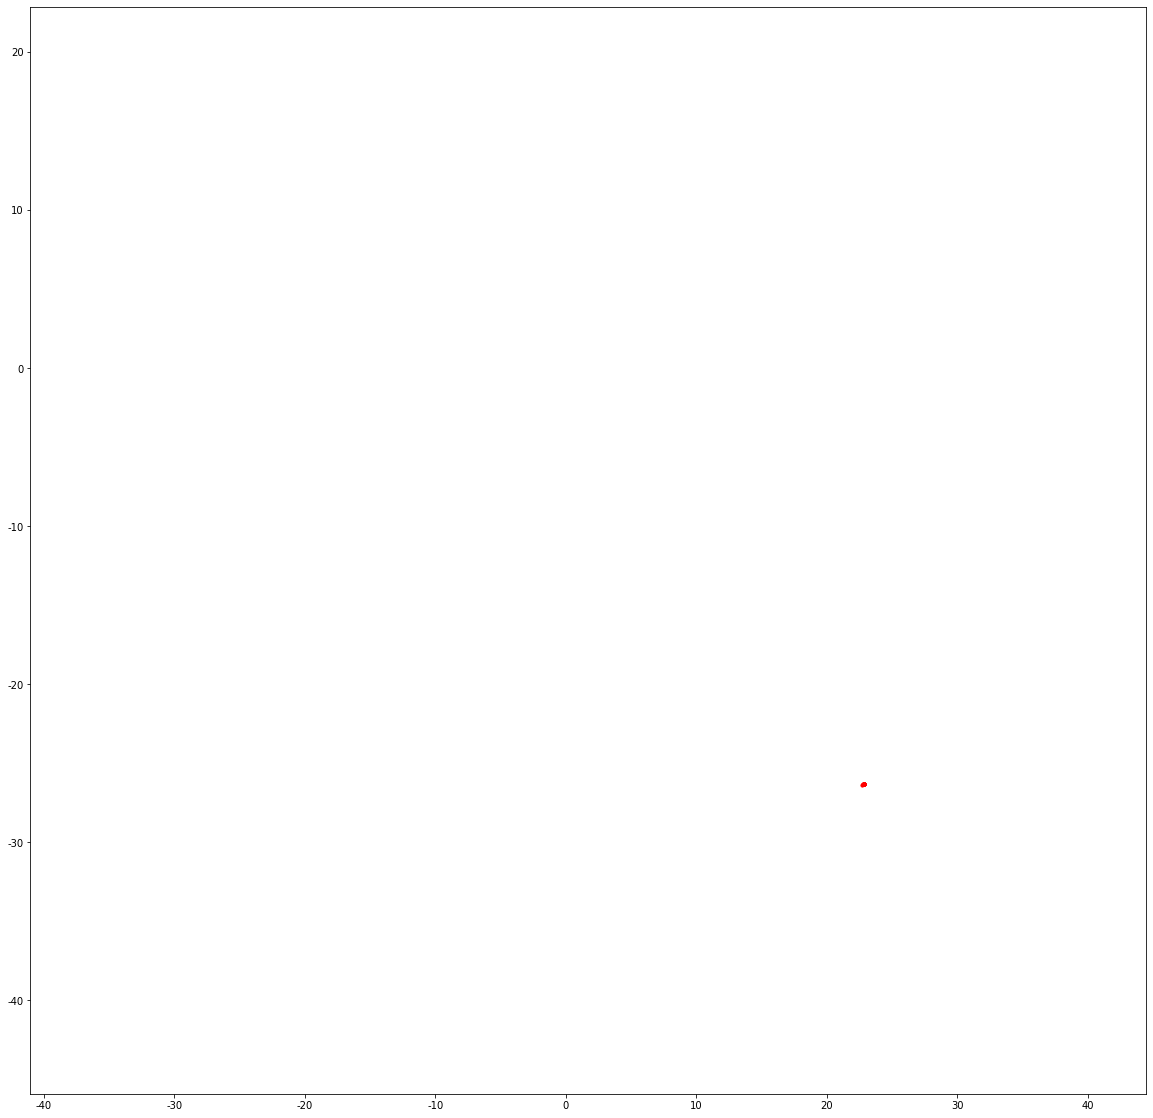

In [310]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 4:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [443]:
print(word_count_and_tf_idf_similarity(communities_4, 4))

[('need', 1.3571), ('depression', 1.3571), ('life', 1.2143), ('depressed', 0.8571), ('friend', 0.7857), ('hate', 0.7143), ('one', 0.6429), ('talk', 0.6429), ('think', 0.6429), ('year', 0.6429), ('kill', 0.6429), ('die', 0.5714), ('time', 0.5714), ('stop', 0.5), ('anxiety', 0.5), ('suicide', 0.5), ('today', 0.5), ('thought', 0.5), ('tired', 0.5), ('better', 0.4286), ('day', 0.4286), ('alone', 0.4286), ('feeling', 0.4286), ('advice', 0.3571), ('never', 0.3571), ('go', 0.3571), ('much', 0.3571), ('end', 0.3571), ('way', 0.3571), ('give', 0.3571), ('care', 0.2857), ('lost', 0.2857), ('back', 0.2857), ('nothing', 0.2857), ('ive', 0.2857), ('hair', 0.2857), ('first', 0.2857), ('old', 0.2143), ('even', 0.2143), ('tonight', 0.2143), ('work', 0.2143), ('sad', 0.2143), ('worse', 0.2143), ('cry', 0.2143), ('therapy', 0.2143), ('made', 0.2143), ('actually', 0.2143), ('alive', 0.2143), ('birthday', 0.2143), ('lonely', 0.2143), ('scared', 0.2143), ('best', 0.1429), ('idk', 0.1429), ('killing', 0.142

## topic_nums = 3 (members >= 10)

# 3-1)

In [264]:
communities_3 = []

for i in range(len(data)):
    if topics_num[i] == 3:
        communities_3.append(filenames[i])

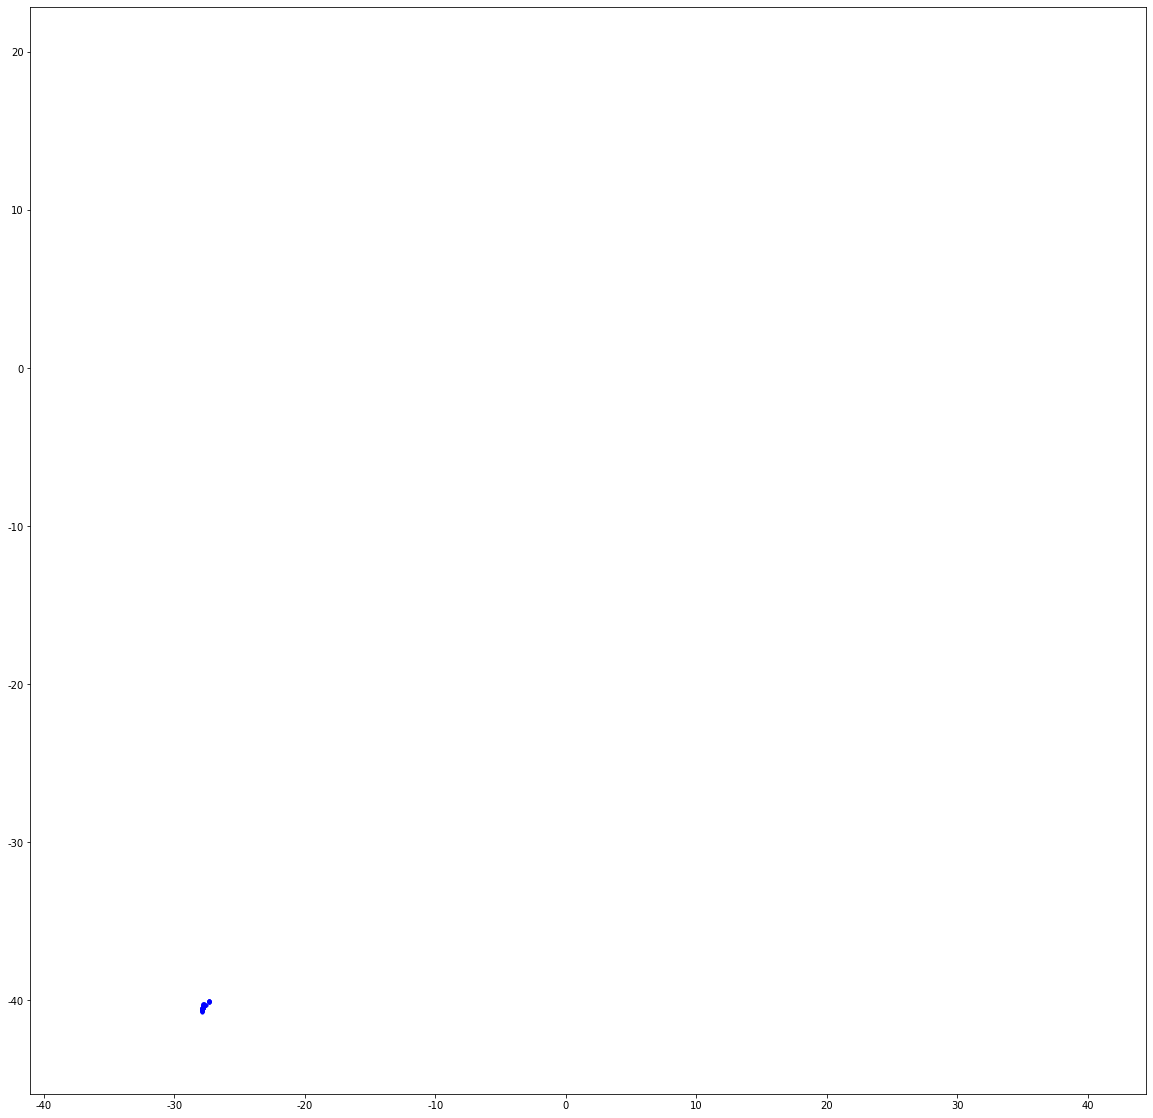

In [372]:
communities_3_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -20 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_1.append(filenames[i])

# 3-2)

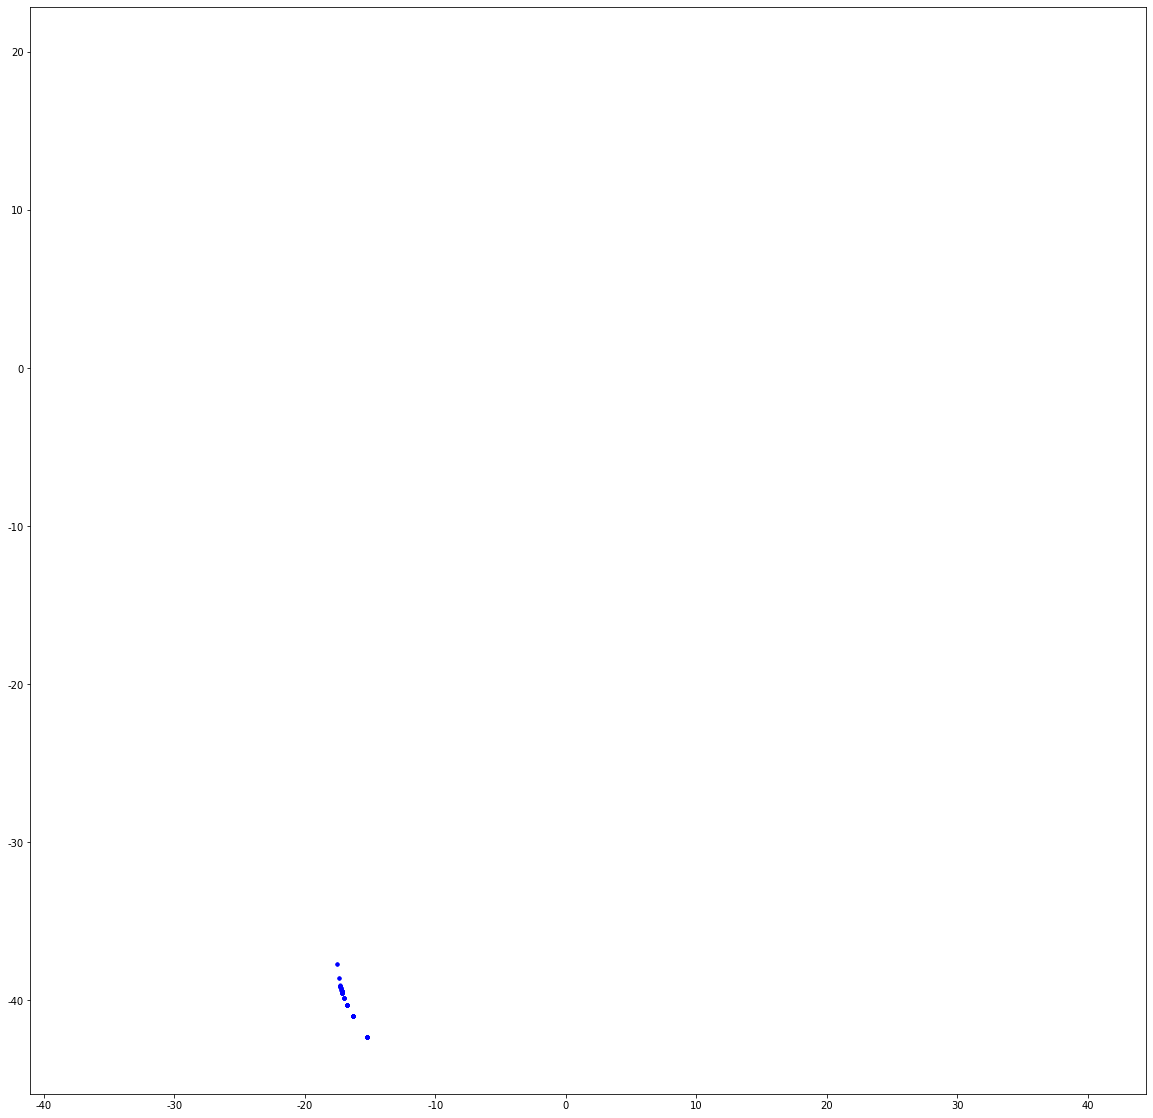

In [373]:
communities_3_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -20 and data_tsne[i,0] < -12:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_2.append(filenames[i])

# 3-3)

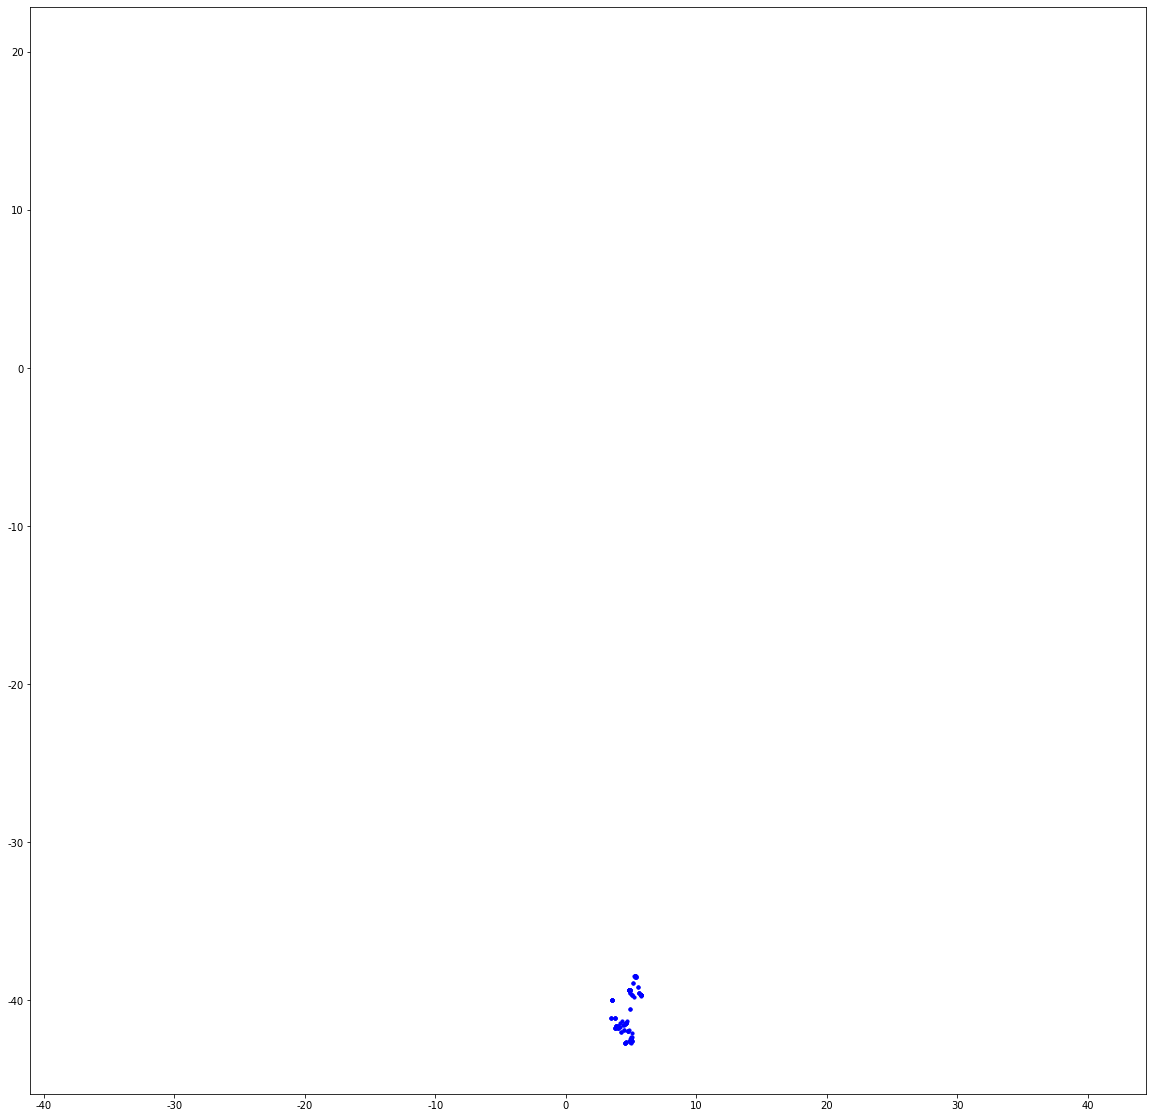

In [374]:
communities_3_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > 0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_3.append(filenames[i])

# 3-4)

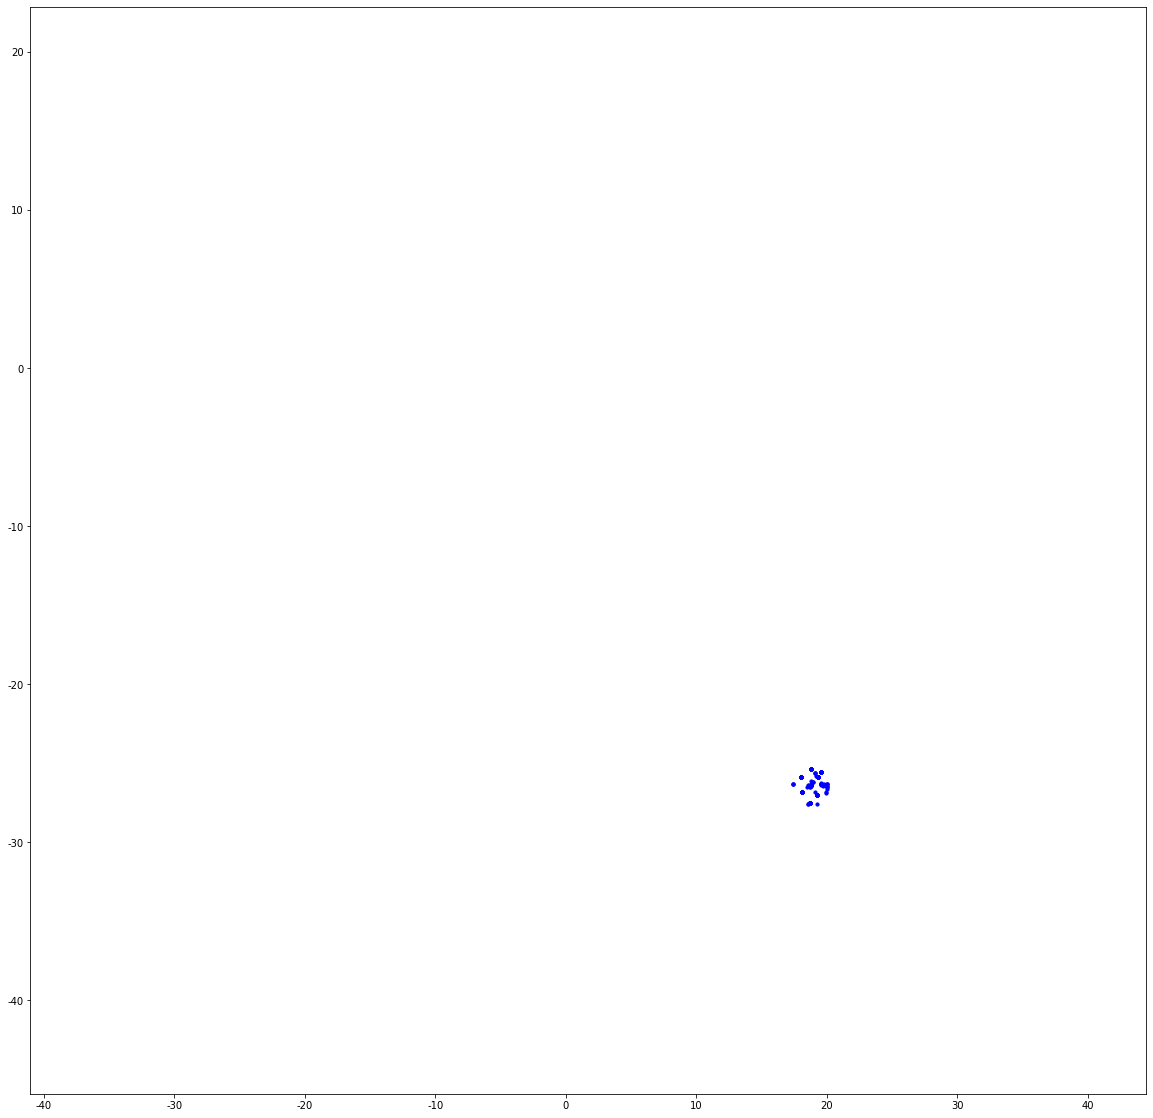

In [375]:
communities_3_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] > -30 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_4.append(filenames[i])

In [448]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_3_1, 3), word_count_and_tf_idf_similarity(communities_3_2, 3), 
                word_count_and_tf_idf_similarity(communities_3_3, 3), word_count_and_tf_idf_similarity(communities_3_4, 3)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('need', 0.5375), ('life', 0.495), ('life', 0.5111), ('life', 0.4281))

2: (('life', 0.525), ('need', 0.4158), ('depression', 0.4222), ('depression', 0.3028))

3: (('depression', 0.4125), ('die', 0.4158), ('need', 0.3611), ('need', 0.2936))

4: (('friend', 0.375), ('hate', 0.3465), ('friend', 0.3444), ('friend', 0.2875))

5: (('hate', 0.35), ('kill', 0.3366), ('year', 0.3111), ('think', 0.2385))

6: (('time', 0.3375), ('talk', 0.2871), ('think', 0.2889), ('kill', 0.2355))

7: (('talk', 0.3), ('lonely', 0.2772), ('day', 0.2778), ('depressed', 0.2232))

8: (('kill', 0.2875), ('depression', 0.2673), ('die', 0.2611), ('die', 0.2232))

9: (('think', 0.275), ('think', 0.2475), ('feeling', 0.2611), ('feeling', 0.2171))

10: (('year', 0.2625), ('birthday', 0.2475), ('today', 0.2444), ('year', 0.2171))

11: (('one', 0.25), ('alone', 0.2277), ('kill', 0.2444), ('one', 0.208))

12: (('today', 0.25), ('anxiety', 0.2178), ('time', 0.2278), ('time', 0.2018))

13: (('anxiety', 0.25), ('friend', 0

## topic_nums = 1 (members < 10)

# 1-1)

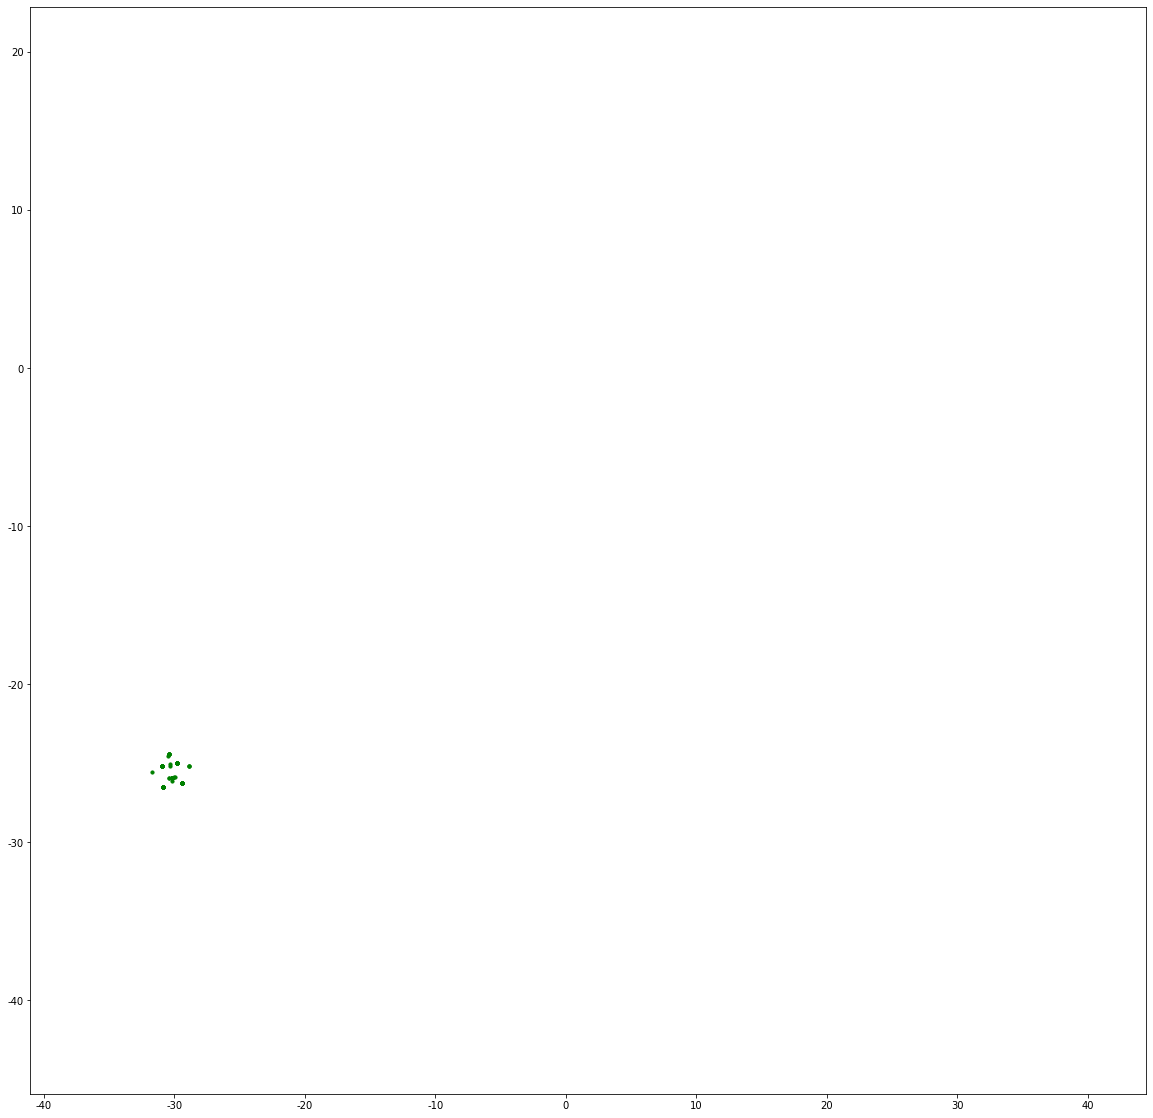

In [377]:
communities_1_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -35 and data_tsne[i,0] < -28:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_1.append(filenames[i])

# 1-2)

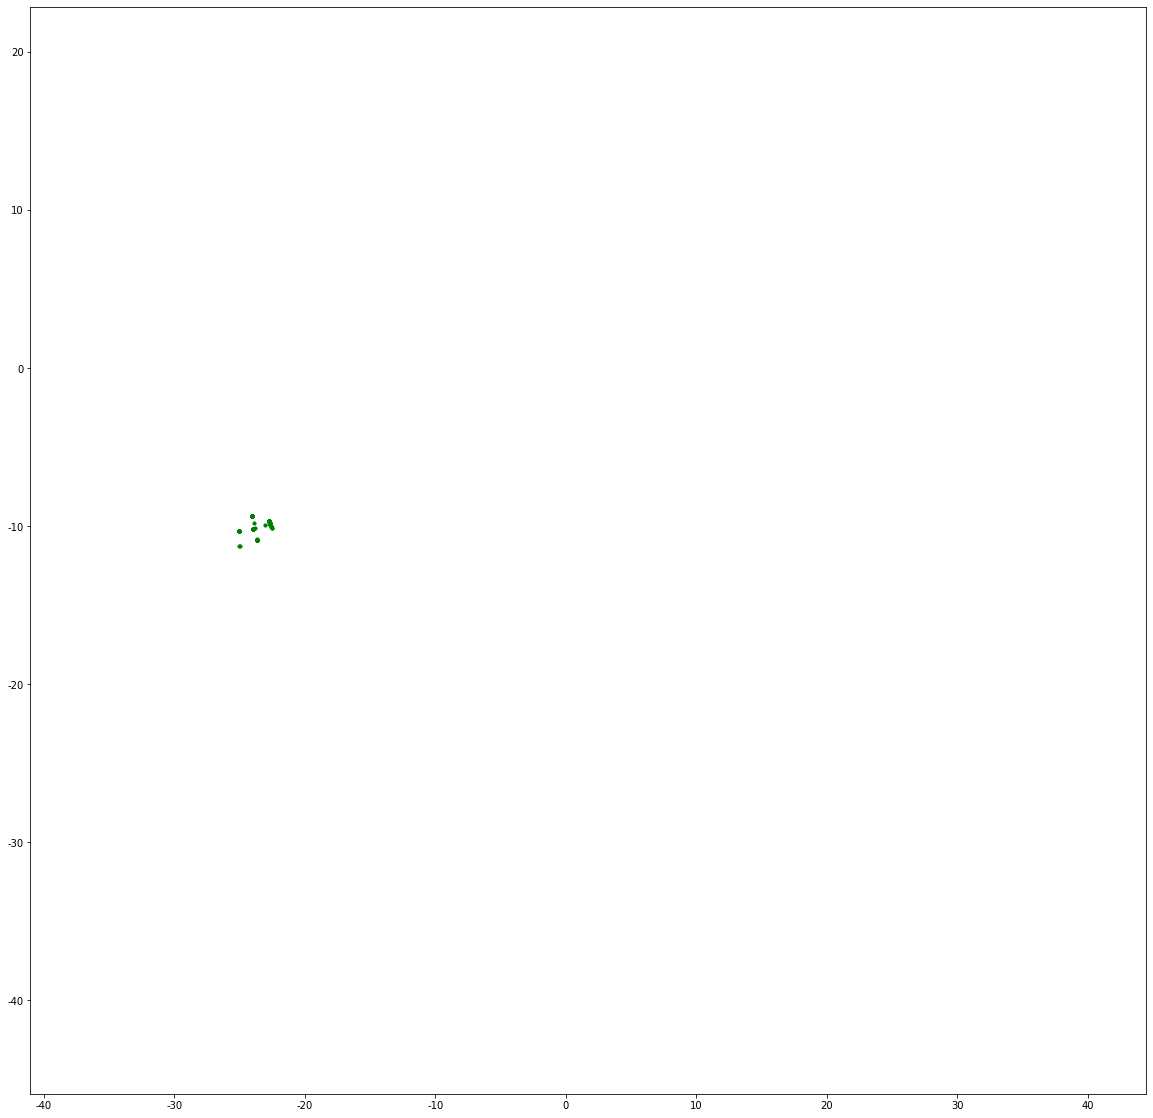

In [378]:
communities_1_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -28 and data_tsne[i,0] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_2.append(filenames[i])

# 1-3)

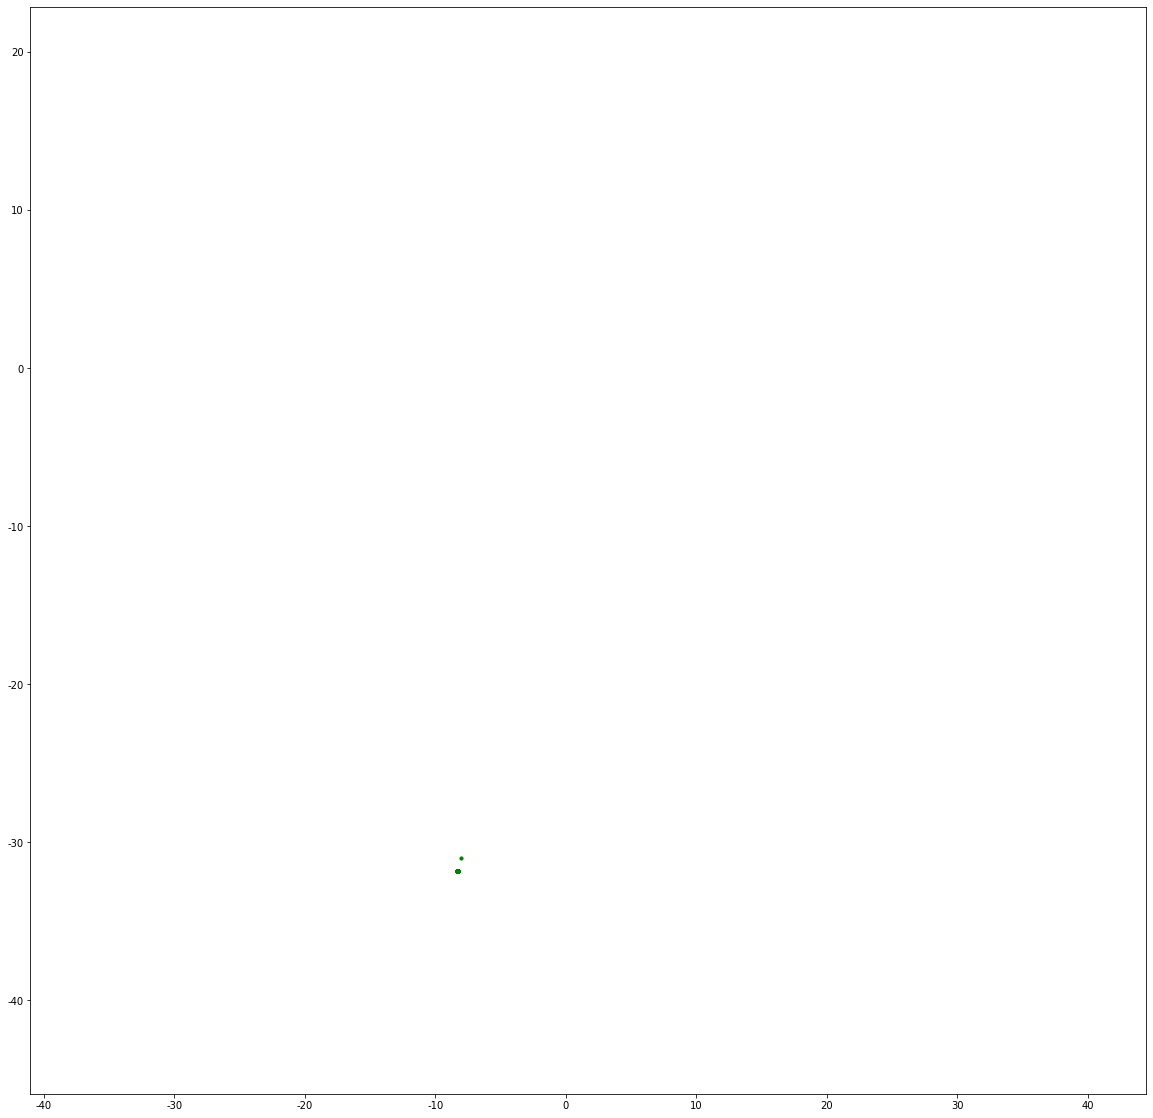

In [379]:
communities_1_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -12 and data_tsne[i,0] < -5 and data_tsne[i,1] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_3.append(filenames[i])

# 1-4)

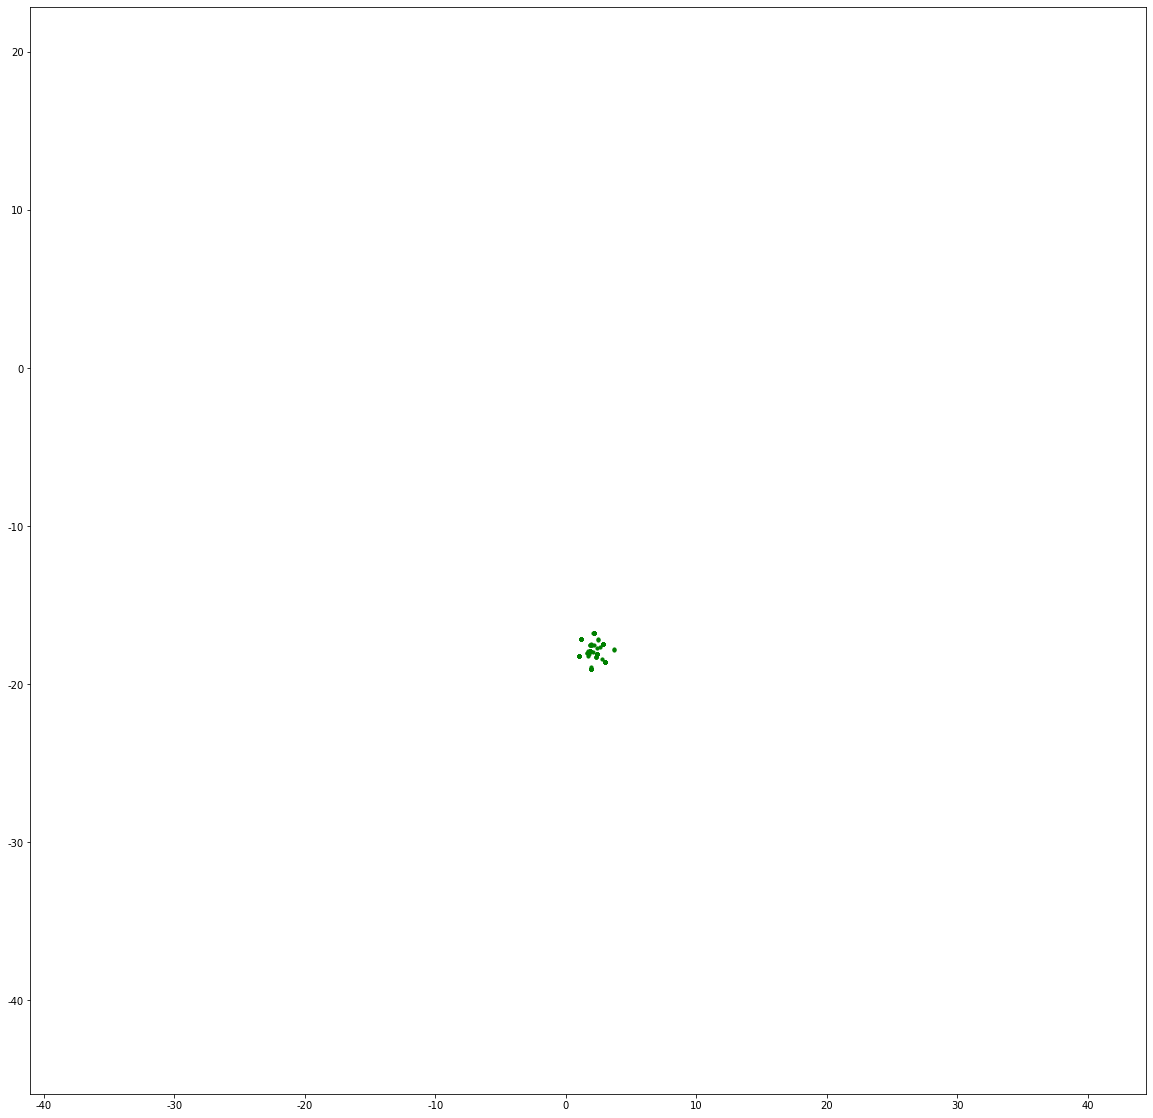

In [380]:
communities_1_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -10 and data_tsne[i,1] > -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_4.append(filenames[i])

# 1-5)

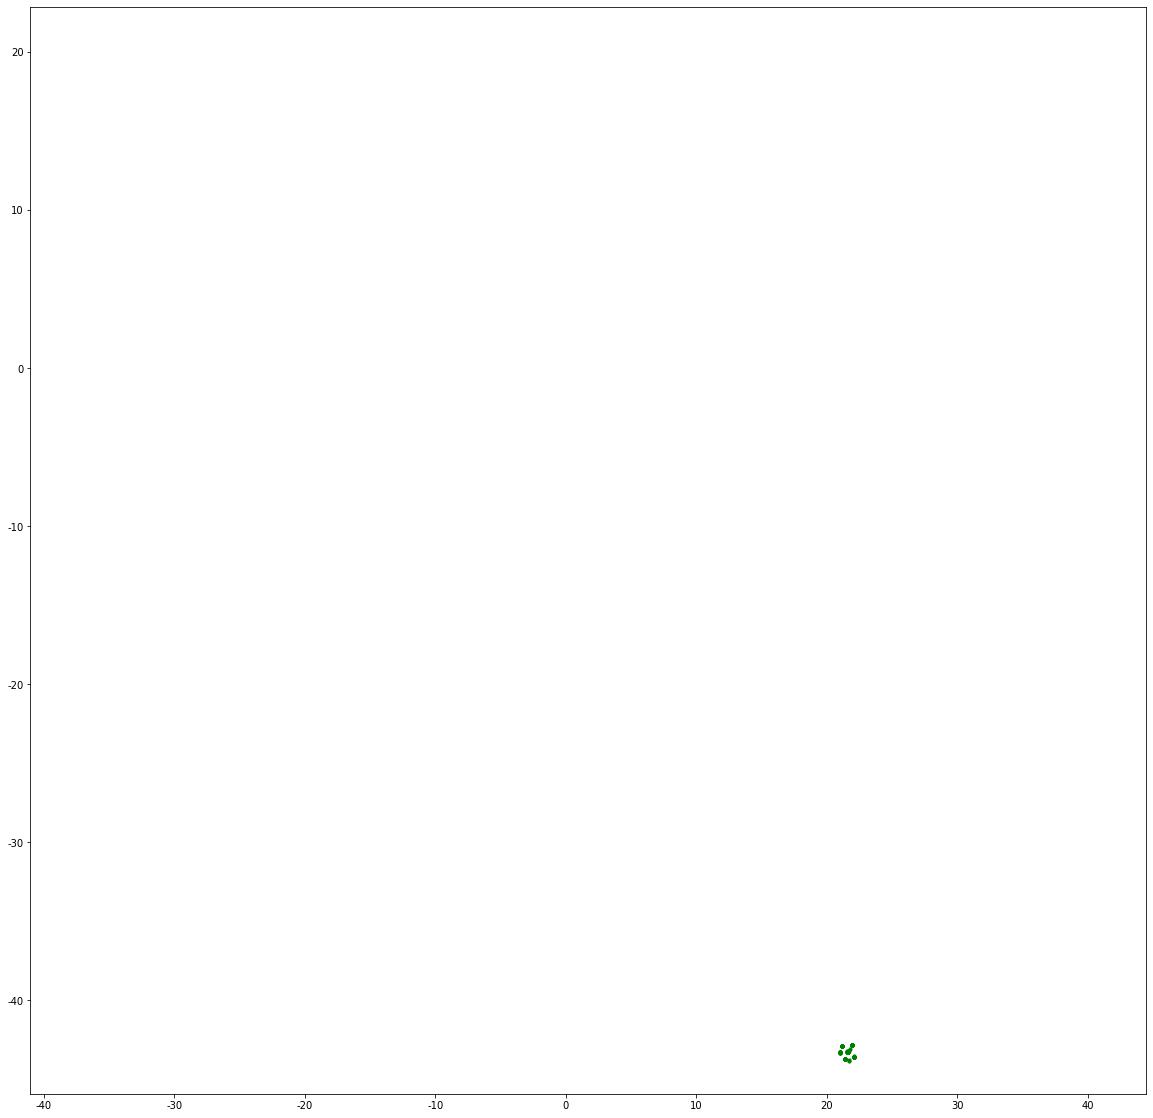

In [381]:
communities_1_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,1] < -40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_5.append(filenames[i])

In [450]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_1_1, 1), word_count_and_tf_idf_similarity(communities_1_2, 1), 
                word_count_and_tf_idf_similarity(communities_1_3, 1), word_count_and_tf_idf_similarity(communities_1_4, 1),
                word_count_and_tf_idf_similarity(communities_1_5, 1)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('life', 0.1197), ('friend', 0.064), ('need', 0.0559), ('life', 0.1048), ('need', 0.0429))

2: (('friend', 0.0931), ('need', 0.0613), ('friend', 0.0382), ('need', 0.081), ('die', 0.0429))

3: (('year', 0.0691), ('life', 0.0613), ('life', 0.0324), ('year', 0.0595), ('help', 0.0368))

4: (('need', 0.0638), ('die', 0.0427), ('depressed', 0.0265), ('kill', 0.0595), ('done', 0.0368))

5: (('anxiety', 0.0638), ('kill', 0.04), ('alone', 0.0235), ('friend', 0.0571), ('kill', 0.0368))

6: (('thought', 0.0559), ('depression', 0.04), ('lonely', 0.0235), ('think', 0.0548), ('talk', 0.0184))

7: (('depression', 0.0532), ('time', 0.04), ('talk', 0.0235), ('die', 0.0524), ('goodbye', 0.0184))

8: (('kill', 0.0532), ('alone', 0.0373), ('hate', 0.0235), ('anxiety', 0.05), ('friend', 0.0184))

9: (('talk', 0.0505), ('suicide', 0.0347), ('die', 0.0206), ('day', 0.0476), ('exist', 0.0123))

10: (('day', 0.0479), ('talk', 0.032), ('today', 0.0206), ('depression', 0.0476), ('option', 0.0123))

11: (('th